# Исследование объявлений о продаже квартир

Цель проекта: научиться определять рыночную стоимость объектов недвижимости.

Задачи:
1) Решить каким образом лучше обработать пропуски и их заменить.
2) Заменить тип данных там где это возможно
3) Обработать уникальные значения
4) Найти и обработать аномальные значения
4) Определить какие параметры влияют на цену 

План работы:
1) Откроем датасет и изучим общую информацию
2) Выполним предобработку данных
3) Добавим новые столбцы
4) Проведем исследовательский анализ данных
5) Сделаем общие выводы

## Откройте файл с данными и изучите общую информацию

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import math

In [5]:
data = pd.read_csv('real_estate_data.csv', sep = '\t')

In [6]:
#Воспользуемся методом для отображнеия всех столбоцов  на экране
pd.set_option("display.max_columns", None)

In [7]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

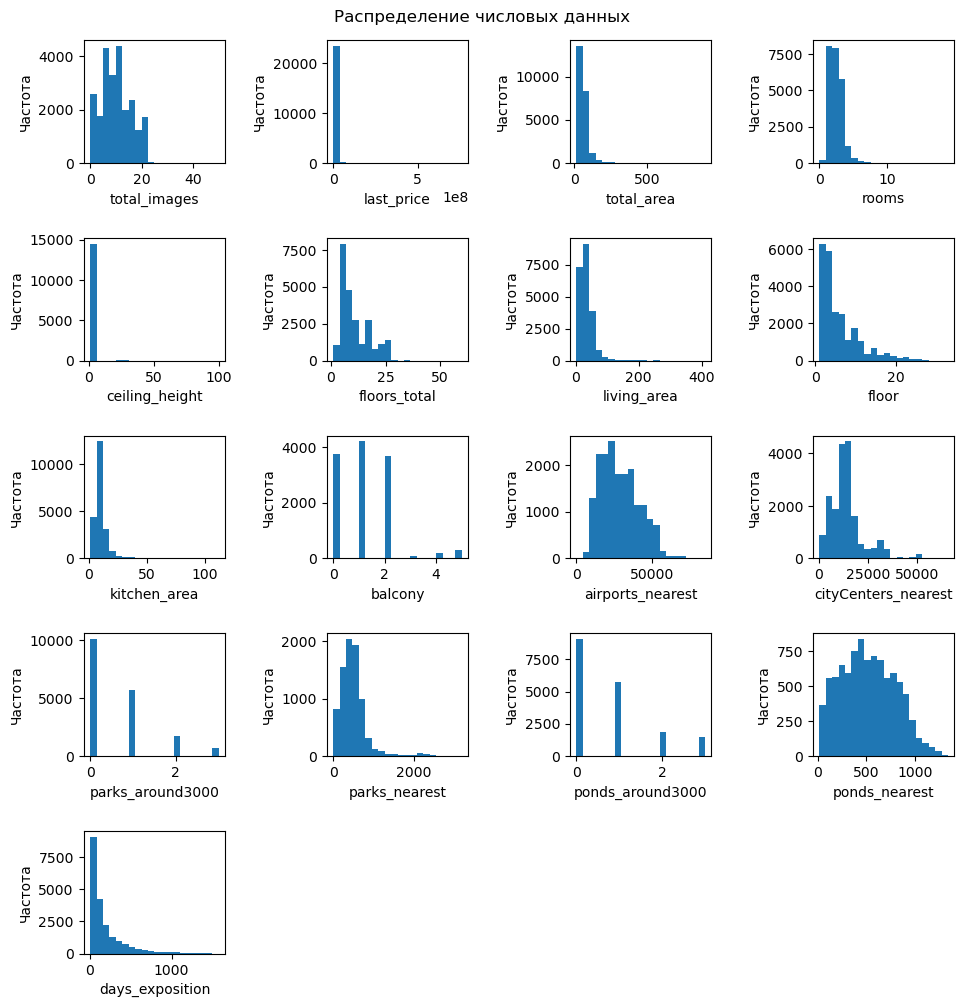

In [9]:
# гистограммы для всех числовых столбцов
fig = plt.figure(figsize=(10,20))
fig.suptitle('Распределение числовых данных')
num_columns = data.select_dtypes(include='number').columns

for i in range(len(num_columns)):
    fig.add_subplot(10, 4, i+1)
    plt.hist(data[num_columns[i]], bins = 20)
    plt.ylabel('Частота')
    plt.xlabel(f"{num_columns[i]}")
    plt.tight_layout(pad = 2)

Выводы:
- Много пропусков
- Поподаются аномальные значения
- В некоторых столбцах тип float можно заменить на int

### 2 Выполните предобработку данных

In [12]:
#С помощью методов isna() и sum() определим кол-во пропусков в каждом столбце
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Предобработка данных столбца 'ceiling_height'**

In [14]:
#Оценим колиственные характеристики
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

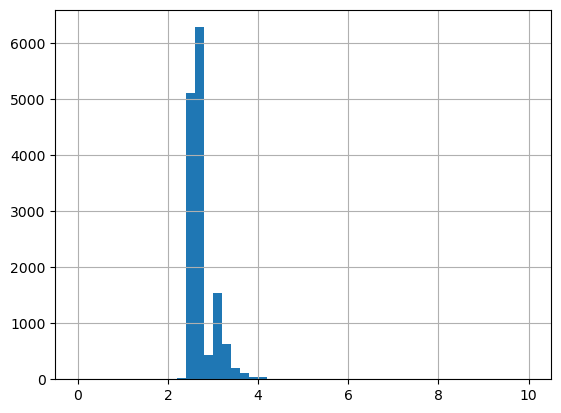

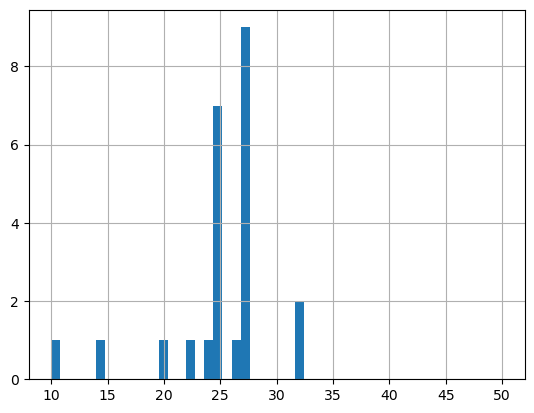

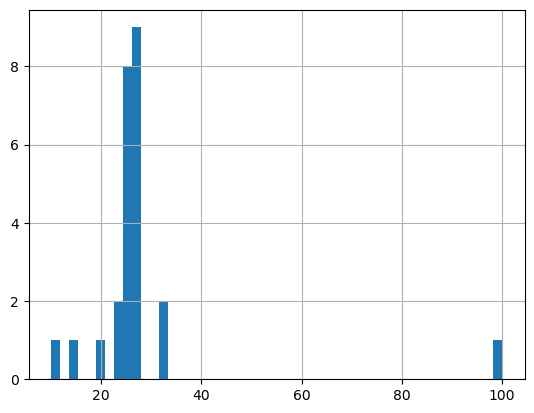

In [15]:
#Оценим наглядно количественные данные на гистограмме методом hist()
data['ceiling_height'].hist(bins = 50, range = (0, 10))
plt.show()
data['ceiling_height'].hist(bins = 50, range = (10, 50))
plt.show()
data['ceiling_height'].hist(bins = 50, range = (10, 100))
plt.show()

Пропуски скорей всего из за человеского фактора. Есть аномальные значения, которые потом нужно исследовать. В основном высота
потолка примерно 2.6 метра.
Пропуски заполним медианным значением, на среднее повлият
слишком большие значения в данных.

In [17]:
#Заполним пропуски значением медианы методом fillna()
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

In [18]:
#Проверим кол-во пропусков
data['ceiling_height'].isna().sum()

0

**Предобработка данных столбца 'floors_total'**

In [20]:
#Оценим колиственные характеристики
data['floors_total'].describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [21]:
# процент пропусков от общего объема
(data['floors_total'].isna().sum()/data.shape[0])*100

0.36288450989493226

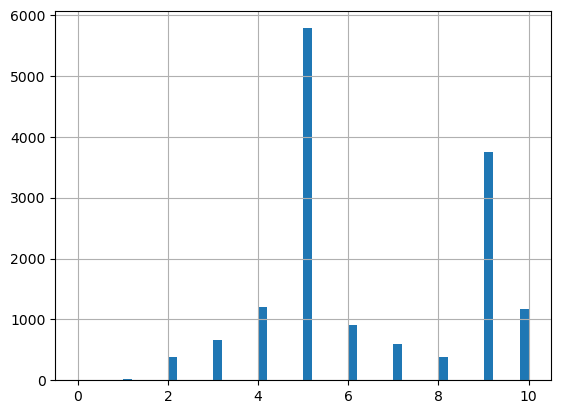

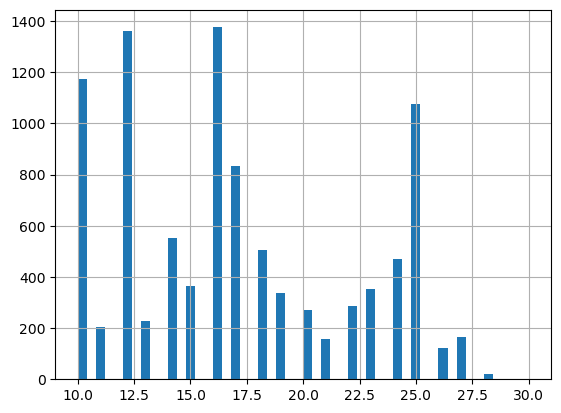

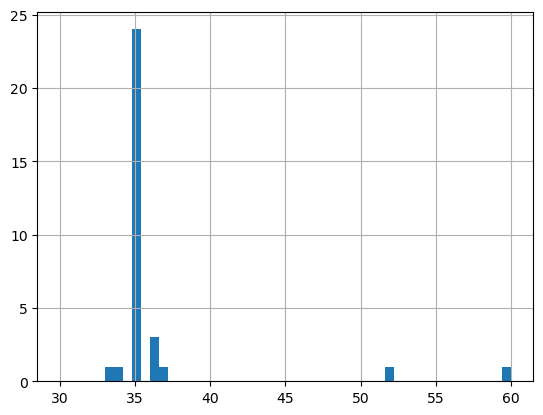

In [22]:
data['floors_total'].hist(bins = 50, range = (0, 10))
plt.show()
data['floors_total'].hist(bins = 50, range = (10, 30))
plt.show()
data['floors_total'].hist(bins = 50, range = (30, 60))
plt.show()

Пропуски также скорей всего из-за человечекого фактора. 
В основном квартиры с 5 - 9 этажами. 
Если заменять медианным значением, может получится, что фактический этаж квартиры больше общего кол-во этажей. Так как пропусков не так много, при удалении потеряем всего 0.4% данных, воспользуемся этим упрощением.

In [24]:
data = data.dropna(subset = 'floors_total')

In [25]:
data['floors_total'].isna().sum()

0

**Предобработка данных столбца living_area**

Пропуски скорей всего из за человеческого фактора, не знание фактического размера, немеренный пропуск, невнимательность....

Общая площадь, помимо жилой и кухни также включает в себя санузлы, кладовые, технические помещения. Поэтому заполнять разницей мы не можем. Но мы можем использовать метод медианного коэффициента - мы можем найти **соотношение медианной общей площади к медианной жилой**. А затем, заполнить пропуски в столбце `living_area` **отношением общей площади к найденному соотношению**.

In [28]:
#Замена пропусков в столбце 'living_area'
data.loc[data['living_area'].isna(), ('living_area')] = \
(data['total_area'] / (data['total_area'].median() / data['living_area'].median()))

In [29]:
#Проверим кол-во пропусков
data['living_area'].isna().sum()

0

**Предобработка данных столбца is_apartment**

In [31]:
#Проверим уникальные значение методом value_counts()
data['is_apartment'].value_counts()

is_apartment
False    2725
True       50
Name: count, dtype: int64

Будем считать, что пропуски связаны с тем что человек оставил поле пустое подразумевая ответ 'нет'.

In [33]:
#Заменим пропуски значением false методом fillna()
data['is_apartment'] = data['is_apartment'].fillna(False)

C:\Users\кц\AppData\Local\Temp\ipykernel_2448\29344774.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['is_apartment'] = data['is_apartment'].fillna(False)


In [34]:
#Проверим кол-во пропусков
data['is_apartment'].isna().sum()

0

**Предобработка данных столбца kitchen_area**

In [36]:
#Оценим данные
data['kitchen_area'].describe()

count    21382.000000
mean        10.564128
std          5.904316
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

Пропуски могут быть связаны также с человеским фактором, возможно кухни просто нет, так как продается комната или планировка ещё не создана.

Если ссылаться на ГОСТ по планировке кухни, или оценить житейский опыт, то обычно кухни не большего размера. В принципе слишком большой кхуни и не надо. В нашем случае размер кухни в основном от 1,3 до 12,9 метров, при медианном значении 9,1 метров. Попадаются аномальные значение, н-р 490 метров, что влияет на среднее число.

Со столбцом kitchen_area можно поступить так же, как со столбцом living_area.


In [38]:
#Замена пропусков в столбце 'kitchen_area'
data.loc[data['kitchen_area'].isna(), 'kitchen_area'] = (data['total_area'].median() / (data['total_area'].median() / data['kitchen_area'].median()))

In [39]:
#Проверим, что общая площадь всегда больше площади кухни
data[data['total_area'] < data['kitchen_area']]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [40]:
#Проверим что жилая площадь не меньше площади кухни
data[data['living_area'] < data['kitchen_area']]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,False,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.65,26.0,10.60,6,False,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
51,7,45000000.0,161.00,2017-10-17T00:00:00,3,3.20,8.0,38.00,4,False,False,False,50.00,NaN,Санкт-Петербург,32537.0,6589.0,0.0,NaN,3.0,99.0,541.0
53,7,4300000.0,39.10,2017-11-10T00:00:00,1,2.65,25.0,15.40,13,False,False,False,15.50,2.0,посёлок Парголово,52611.0,18783.0,0.0,NaN,0.0,NaN,6.0
101,4,3000000.0,37.00,2019-03-23T00:00:00,1,2.75,10.0,12.00,3,False,False,False,13.00,NaN,садовое товарищество Новая Ропша,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23208,12,4800000.0,37.00,2016-02-24T00:00:00,1,2.65,14.0,8.00,11,False,False,False,22.00,0.0,Санкт-Петербург,27838.0,12387.0,2.0,358.0,1.0,950.0,139.0
23388,7,5400000.0,43.00,2017-04-24T00:00:00,1,2.65,18.0,12.00,8,False,False,False,20.00,0.0,Санкт-Петербург,25108.0,15940.0,0.0,NaN,0.0,NaN,124.0
23481,1,3000000.0,37.29,2019-04-15T00:00:00,1,2.65,19.0,10.08,10,False,False,False,16.88,NaN,Санкт-Петербург,37006.0,15157.0,0.0,NaN,0.0,NaN,7.0
23573,8,6290000.0,47.67,2019-03-20T00:00:00,1,3.60,12.0,13.59,12,False,False,False,17.87,2.0,Санкт-Петербург,35726.0,16028.0,1.0,253.0,2.0,99.0,19.0


Такого не должно быть. Возможно из за ошибка в данных из за чел.фактора, или действительно так и есть. Можно удалить данные, но тогда потеряем
372 строки.

Можно заменить такие данные на медианное значение. 

Таких данных немного, примем, что такие допущение могут быть в реальной жизни.


In [42]:
#Проверим кол-во пропусков
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                 11480
locality_name              48
airports_nearest         5532
cityCenters_nearest      5509
parks_around3000         5508
parks_nearest           15568
ponds_around3000         5508
ponds_nearest           14552
days_exposition          3172
dtype: int64

**Предобработка данных столбца balcony**

In [44]:
data['balcony'].value_counts()

balcony
1.0    4195
0.0    3713
2.0    3657
5.0     304
4.0     183
3.0      81
Name: count, dtype: int64

Пропуски скорей всего связаны с тем что человек оставил пустое поле подразумевая отсуствие балкона. Заменим их на нулевое значение.

In [46]:
#Заменим пропуски мединным значением методом fillna()
data['balcony'] = data['balcony'].fillna(0)

In [47]:
#Проверим кол-во пропусков
data['balcony'].isna().sum()

0

**Предобработка данных столбца locality_name**

In [49]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

Попадаются уникальные значения, например, «поселок Рябово» и «поселок городского типа Рябово», «поселок Тельмана» и «посёлок Тельмана». В каких то словах 'ё' в каких то 'е', что неудобно. В принципе можно разделить местоположение на категории, так будет проще анализировать.

In [51]:
#Заменим ё на е c помощию str.replace(). Поменяем уникальные значения методом replace()
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['городской поселок'], 'поселок городского типа', regex=True)
) 
data['locality_name'] = (
    data['locality_name']
    .replace(['садоводческое некоммерческое товарищество',], 'садовое товарищество', regex=True)
) 
data['locality_name'] = (
    data['locality_name']
    .replace(['поселок при железнодорожной станции',], 'поселок станции', regex=True)
) 

In [52]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалево',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'деревня Агалатово', 'деревня Аро', 'деревня Батово',
       'деревня Бегуницы', 'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие Колпаны',
       'деревня Большое Рейзино', 'деревня Большой Сабск', 'деревня Бор',
       'деревня Борисова Грива', 'деревня Ваганово', 'деревня Вартемяги',
       'деревня Вахнова Кара', 'деревня Выскатка

Пропусков в столбце locality_name мало, лучше сразу удалить их, чем заполнить значением, которое не является названием населенного пункта

In [54]:
data = data.dropna(subset = 'locality_name').reset_index(drop = True)

In [55]:
#Проверим кол-во пропусков
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

In [56]:
#Создадим функцию,которая по определнному набор слов возвращает название категории
def categorize_locality_name(row):
    try:
        if 'деревня' in row:
            return 'деревня'
        if 'коттедж' in row:
            return 'коттеджный поселок'
        if 'село' in row and not 'поселок' in row:
            return 'село'
        if 'поселок' in row and not 'городского' in row and not 'коттедж' in row and not 'станции' in row:
            return 'поселок'
        if 'садовое' in row:
            return 'садовое товарищество'
        if 'станции' in row:
            return 'поселок станции'
        if 'городского' in row:
            return 'ПГТ'
        elif 'unknow' in row:
            return 'unknow'
        else:
            return 'город'
    except:
        return 'нет категории'

In [57]:
#Создадим отдельный столбец для категорий и применем метод apply(),который вызовет функцию categorize_locality_name для
#каждой строки столбца 'locality_name'
data['locality_name_category'] = data['locality_name'].apply(categorize_locality_name)

In [58]:
data['locality_name_category'].value_counts()

locality_name_category
город                   19934
поселок                  2084
деревня                   944
ПГТ                       548
село                       32
поселок станции            15
садовое товарищество        5
коттеджный поселок          3
Name: count, dtype: int64

In [59]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_category
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.000000,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,город
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.600000,1,False,False,False,11.0,2.0,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,поселок
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.300000,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,город
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,91.730769,9,False,False,False,9.1,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,город
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.000000,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,город


Пропуски могут быть связна с нежеланием человека указывать место локации, из за плохого расположения, с целью привлечь больше внимания.
Или просто сыграл человеский фактор, случайно пропустили, невнимательность и все в этом духе.


**Предобработка данных столбца airports_nearest**

Данные заполнялись автоматически из геосервисов, так что пропуски связаны с какими - либо техническими проблемами, сбоями...Возможно в объявлении не было указано улицы, района, координат, геолокации.... из-за чего система не определила расстояние.

город


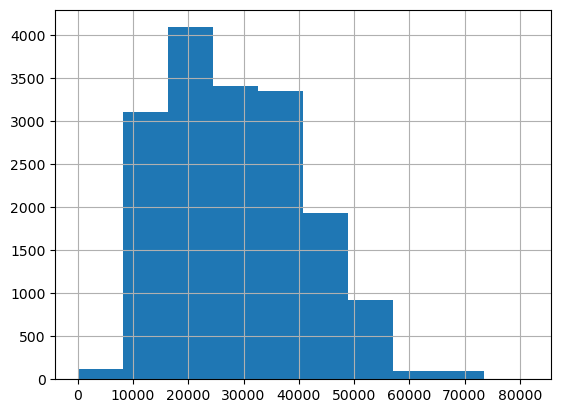

поселок


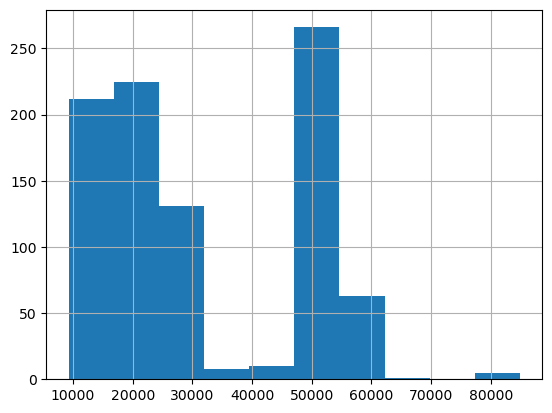

ПГТ


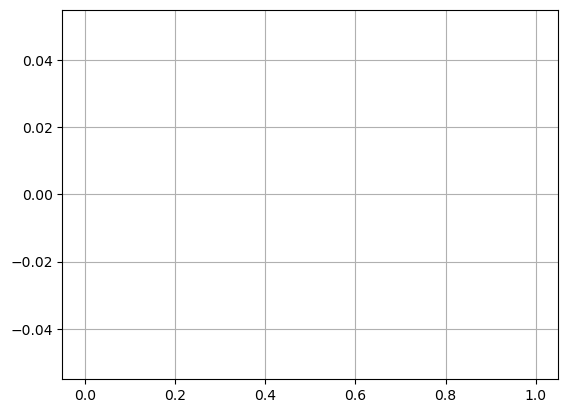

деревня


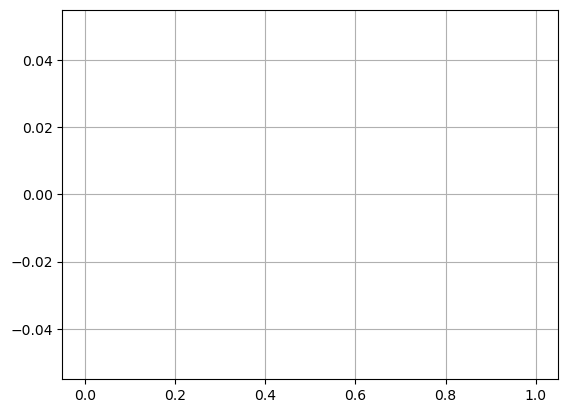

садовое товарищество


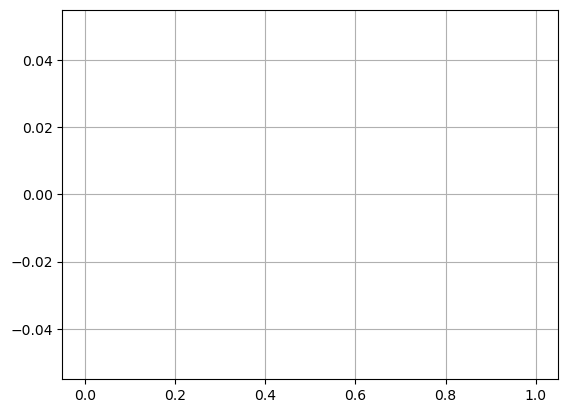

село


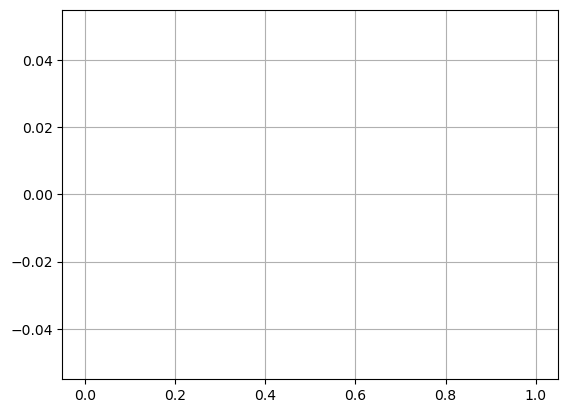

поселок станции


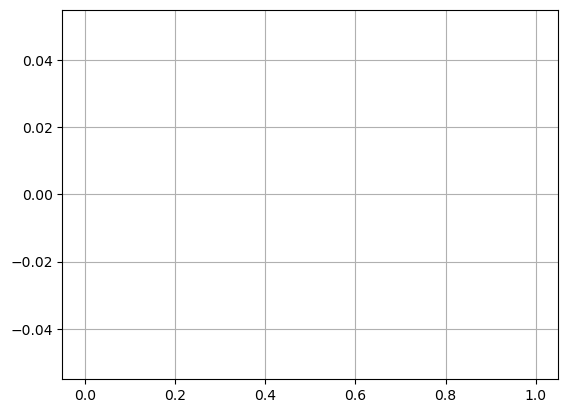

коттеджный поселок


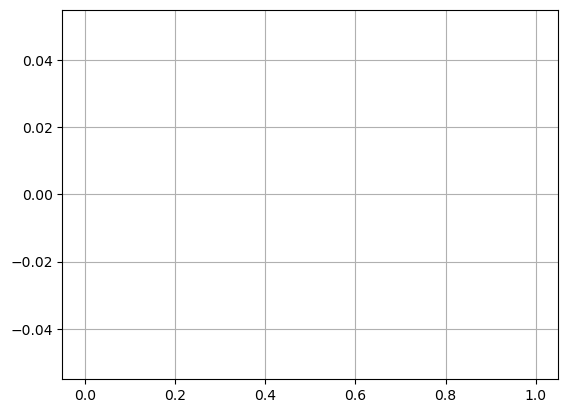

In [63]:
#Рассмотрим как распределяюстя расстояния до аэропорта в зависимости от типа населенного пунтка
for d in data['locality_name_category'].unique():
    print(d)
    data.loc[(data['locality_name_category'] == d), 'airports_nearest'].hist()
    plt.show()

В городах в основном расстояние до аэропорта находится на расстоянии 20000 метров. В поселках 50000 метров. В категории unknow попадаются в основном 
25000 метров, скорей всего это также поселки или города.

Анализируя каждый населенный пункт, где есть информация о расстоянии до аэропорта, например санкт-петербург, можно вывести среднее, но будет большая погрешность если площадь города слишком огромна. 

В поселках обычно небольшие территории, возможно диапазон расстояний до аэропорта для каждого отдельного поселка будет примерно одинаковый и тогда пропуски логично заполнить средним значением.

Во всех остальных населенных типах вообще нет данных о расстоянии до аэропорта.

По идее нужно проверить каждый поселок и город, оценить среднее расстояние до аэропорта,чтобы понять можно ли заполнить пропуски средним числом, или все же будут большие отклонения от среднего, в противном случае искать другой способ заполния пропусков. 

Так как в данном проекте нужно найти зависимость распределения цены от расстояния до центра только в Санкт-Петербурге, воспользуемся этим упрощением и проанализируем данные болле подробно.


Проверим идею:
1) Определим есть ли квартиры в Санкт-Петербурге расположенные в центре города( около 500 метров от центра), тогда можно предположить, что расстояние до аэропорта у таких квартир будет примерно одинаковым, так как расстояние от центра до аэропорта будет постоянной велечиной, если конечно аэропорт один.

In [66]:
data.loc[
(data['locality_name'] == 'Санкт-Петербург') & (data['airports_nearest'] == 'unknow') & (data['cityCenters_nearest'] < 500), 
('airports_nearest',  'cityCenters_nearest')
]

,airports_nearest,cityCenters_nearest


Таких квартир нет( пропуски оставляем

Проверим как сильно расстояние до аэропорта для Санк-Петербурга отличаются от среднего

In [69]:
data.loc[
(data['locality_name'] == 'Санкт-Петербург'), 'airports_nearest'].std()

11548.999483148345

На целых 11557 метров. Получается многовато, заполнять пропуски средним арифметическим плохая идея. 

Слишком мало информации, чтобы более точно заполнить пропуски. Так как в данном проекте в принцпе не так важно знать расстояние до аэропорта, хотя на цену это скорей всего влияет, оставим пропуски как nan. 

Заполнять пропуски значением типа 'unknow' не вижу смысла, так как тип данных изменится на object вместо float, что будет не удобно для анализа.

**Предобработка данных столбца cityCenters_nearest**

Причина пропусков аналогична как и в столбце airports_nearest.

город


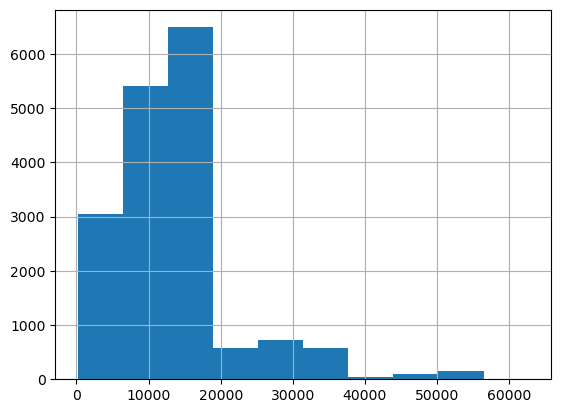

поселок


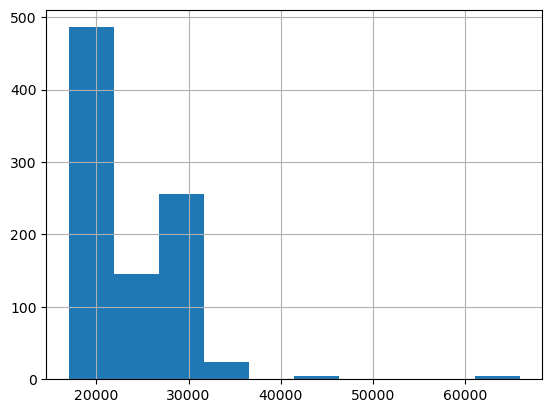

ПГТ


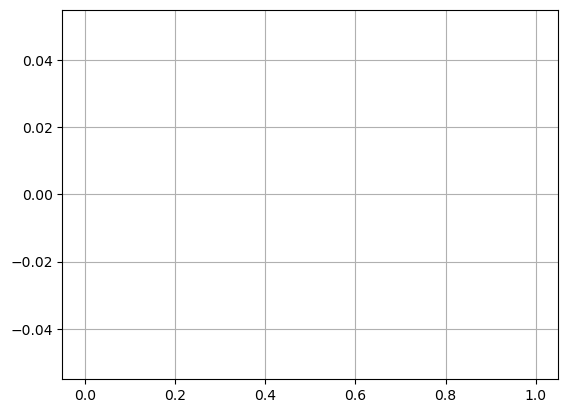

деревня


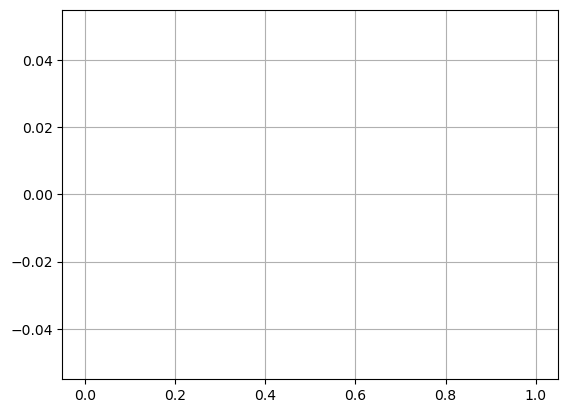

садовое товарищество


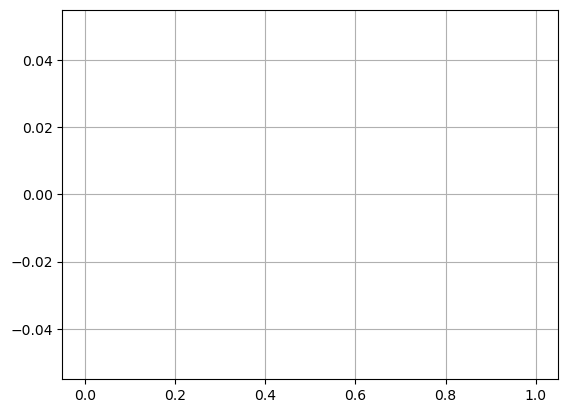

село


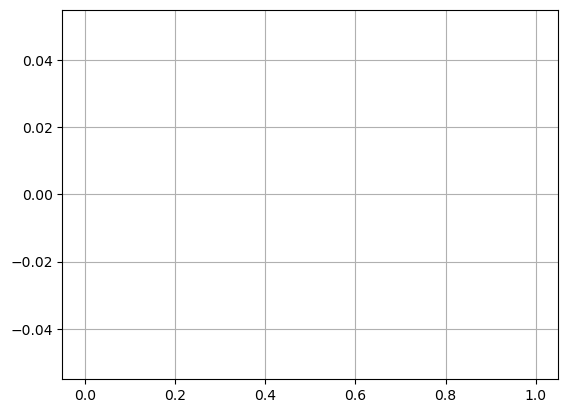

поселок станции


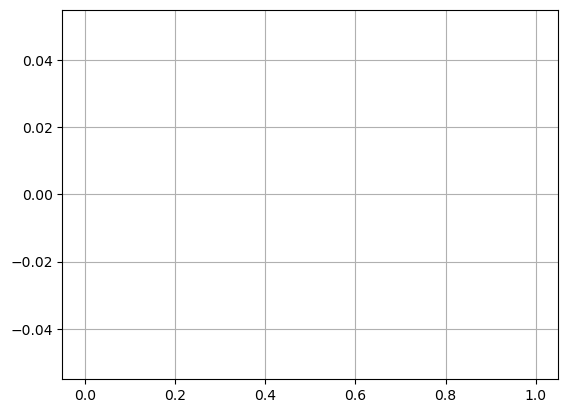

коттеджный поселок


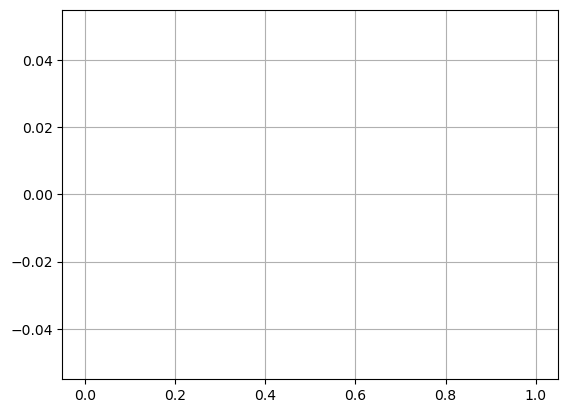

In [73]:
#Рассмотрим как распределяюстя расстояния до центра в зависимости от типа населенного пунтка
for d in data['locality_name_category'].unique():
    print(d)
    data.loc[(data['locality_name_category'] == d), 'cityCenters_nearest'].hist()
    plt.show()

В города в основном расстояние до цента 15000 метров. В поселках 20000 метров. В категории unknow 2500 - 5000 метров, скорей всего это либо поселки либо города.

В городах может быть большой разброс расстояний до центра, так как площадь города не маленькая. В поселках наооборт можно предположить, что расстояние до центров примерно одинаково.

Если предположить, что поселки действительно мальнькие по площади и квартиры в основном находятся рядом друг к другу, то пропуски в столбце для каждго поселка можно заполнить средним арифмитическим, но опять же это много лишних действий. Примем упрощения,что нас интересует только Санкт-Петербург.

Проверим для Санкт - Петербурга есть ли квартиры рядом с аэрапотром(<500 м), тогда у них будет примерно одинаковое расстояние до центра.

In [76]:
distance_airports_500 = data.loc[
(data['locality_name'] == 'Санкт-Петербург'), 
('airports_nearest',  'cityCenters_nearest')
]

In [77]:
distance_airports_500.query('airports_nearest < 500')

,airports_nearest,cityCenters_nearest
20968,0.0,22801.0


Есть одна квартира рядом с аэропортом, если бы получилось что квартир много и у них неизвестно расстояние до центра, можно было бы заполнить средним значеним для всех остальных, так как они находятся рядом и до центра будет примерно равное расстояние.

Слишком мало информации, чтобы более точно заполнить пропуски.

Заполнять пропуски значением типа 'unknow' не вижу смысла, так как тип данных изменится на object вместо float, что будет не удобно для анализа.

**Предобработка данных столбцов parks_around3000 и parks_nearest**

Данные заполнялись автоматически из геосервисов, так что пропуски связаны с какими - либо техническими проблемами, сбоями...Возможно в объявлении не было указано улицы, района, координат, геолокации.... из-за чего система не определила расстояние

Проверим данные где кол-во парков в радиусе 3км не равно 0, и есть пропуски в 'parks_nearest', тогда их можно заполнить как что то среднее.

In [81]:
data.query('parks_nearest.isna() and parks_around3000 > 0')[['parks_around3000', 'parks_nearest']]

,parks_around3000,parks_nearest


Таких данных не нашлось.

Поменяем условия местами, проверим есть данные где расстояние до ближайшего парка больше 0, а кол-во равно нулю.

In [83]:
data.query('parks_nearest > 0 and parks_around3000.isna()')[['parks_around3000', 'parks_nearest']]

,parks_around3000,parks_nearest


In [84]:
#Проверим правильность данных: расстояние до парков должно быть обязательно больше 3000,
#где кол-во парков в радиусе 3000м равно 0
data.query('parks_nearest > 3000 and parks_around3000 == 0')[['parks_around3000', 'parks_nearest']]

,parks_around3000,parks_nearest
1585,0.0,3064.0
10898,0.0,3190.0
19101,0.0,3013.0
19322,0.0,3190.0


Расстояние до парков в радиусе 3000 больше 3000 м, данные логичны.

Возможно предположить, что пропуски в 'parks_around3000' связаны c отсутвием парков, но нет 100% уверенности, что это так. 

Можно проанализировать как изменяются расстояния отдельно для каждого маленького населенного пункта, так как там либо нет парков либо только 1 и заполнить пропуски средним значеним, но это много лишних действий. 

Посмотрим как изменяются значения для Санкт - Петербурга

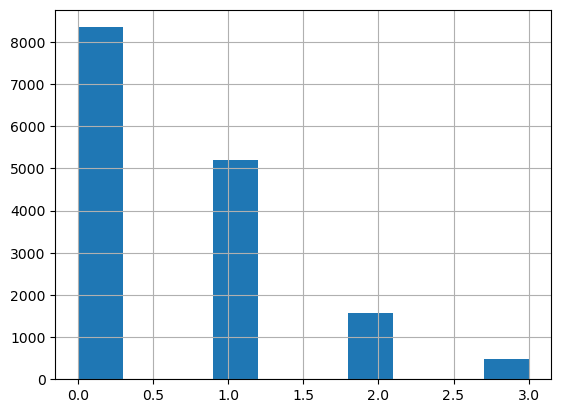

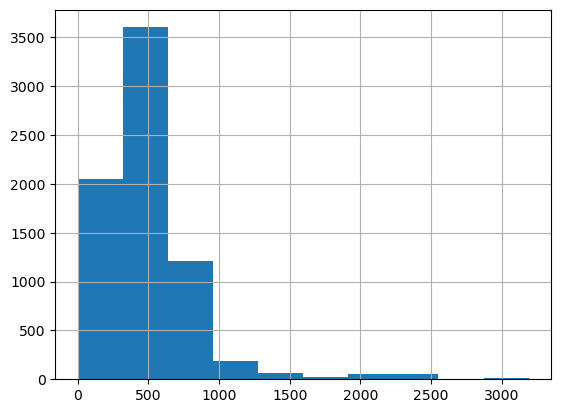

In [86]:
data.query('locality_name == "Санкт-Петербург" ')['parks_around3000'].hist()
plt.show()
data.query('locality_name == "Санкт-Петербург" ')['parks_nearest'].hist()
plt.show()

В основном для квартир в Санкт - Петербурге в радиусе 3000 м парки отсутвуют.

Где есть парки в радиусе 3000 км, они располагаются от квартир чаще в 500 м.

 Столобец 'parks_nearest' точно не получится заполнить 0 так как в Санкт - Петербурге в любом случае есть парк на каком то определенном расстоянии.

Столбец 'parks_around3000' также не логично заполнять 0.

Предположим, что пропуски можно заполнить средним значением в зависимости от кол-во парков.

In [88]:
for i in [0 , 1, 2, 3, 4]:
    print('Кол-во парков в радиусе 3 км = {i} и кол-во пропусков {u}'. \
          format(i = i, u = data.loc[(data['locality_name'] == "Санкт-Петербург") & (data['parks_around3000'] == i), 'parks_nearest'].isna().sum()))

Кол-во парков в радиусе 3 км = 0 и кол-во пропусков 8340
Кол-во парков в радиусе 3 км = 1 и кол-во пропусков 0
Кол-во парков в радиусе 3 км = 2 и кол-во пропусков 0
Кол-во парков в радиусе 3 км = 3 и кол-во пропусков 0
Кол-во парков в радиусе 3 км = 4 и кол-во пропусков 0


Axes(0.125,0.11;0.775x0.77)


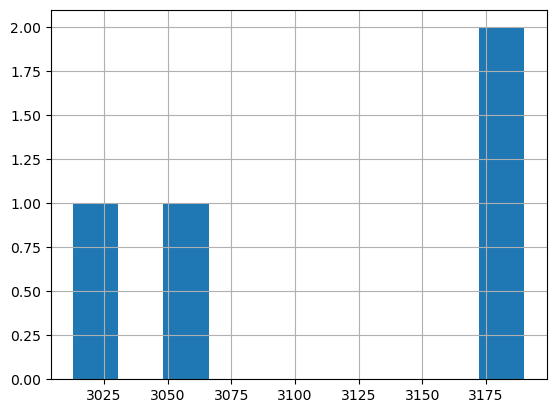

In [89]:
print(data.query('locality_name == "Санкт-Петербург" and parks_around3000 == 0')['parks_nearest'].hist())

Где нет парков в радиусе 3 км, расстояние изменяется от 3025 - 3145 м, но таких данных очень мало, чтобы заполнить все пропуски средним значеним, потому что площадь города большая и врядли все 8376 квартир будет иметь расстояние до парков от 3000 метров.

Слишком мало информации, чтобы более точно заполнить пропуски.

Заполнять пропуски значением типа 'unknow' не вижу смысла, так как тип данных изменится на object вместо float, что будет не удобно для анализ



**Предобработка данных столбцов ponds_nearest и ponds_around3000**

Данные заполнялись автоматически из геосервисов, так что пропуски связаны с какими - либо техническими проблемами, сбоями...Возможно в объявлении не было указано улицы, района, координат, геолокации.... из-за чего система не определила расстояние

Проверим данные где кол-во водоемов в радиусе 3км не равно 0, и есть пропуски в 'parks_nearest', тогда их можно заполнить как 3 км.

In [93]:
data.query('ponds_nearest.isna() and ponds_around3000 > 0')[['ponds_around3000', 'ponds_nearest']]

,ponds_around3000,ponds_nearest


In [94]:
data.query('ponds_nearest > 0 and ponds_around3000.isna()')[['ponds_around3000', 'ponds_nearest']]

,ponds_around3000,ponds_nearest


Можно проанализировать как изменяются расстояния отдельно для каждого маленького населенного пункта, так как там либо нет парков либо только 1 и заполнить пропуски средним значеним, но это много лишних действий. 

Также заполним пропуски unknow.

Посмотрим как изменяются значения для Санкт - Петербурга

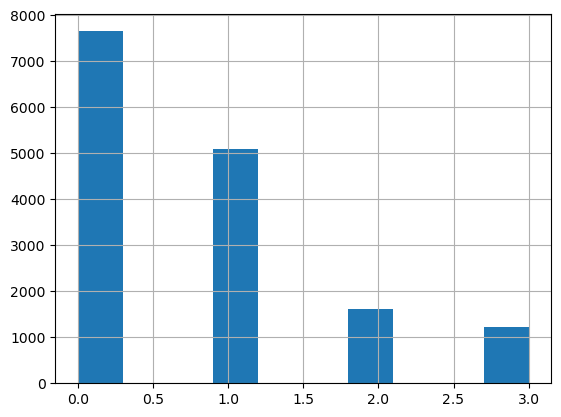

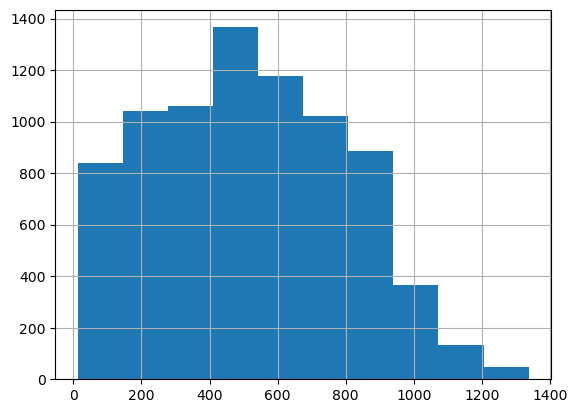

In [96]:
data.query('locality_name == "Санкт-Петербург" ')['ponds_around3000'].hist()
plt.show()
data.query('locality_name == "Санкт-Петербург" ')['ponds_nearest'].hist()
plt.show()

В основном водоемы у квартир отстуствуют. 

Где есть водоемы они располагются в основном на расстоянии 500 метров от квартир.

Предположим, что пропуски можно заполнить средним значением в зависимости от кол-во водоемов. Тогда проверим есть ли такие данные.

In [98]:
print(data.query('locality_name == "Санкт-Петербург" and ponds_around3000 == 1 and ponds_nearest.isna()')['ponds_nearest'])
print(data.query('locality_name == "Санкт-Петербург" and ponds_around3000 == 2 and ponds_nearest.isna()')['ponds_nearest'])
print(data.query('locality_name == "Санкт-Петербург" and ponds_around3000 == 3 and ponds_nearest.isna()')['ponds_nearest'])

Series([], Name: ponds_nearest, dtype: float64)
Series([], Name: ponds_nearest, dtype: float64)
Series([], Name: ponds_nearest, dtype: float64)


Слишком мало информации, чтобы более точно заполнить пропуски. Оставим пропуски nan.

Заполнять пропуски значением типа 'unknow' не вижу смысла, так как тип данных изменится на object вместо float, что будет не удобно для анализ.

Решая аналитические задачи, заполнение пропусков может быть необязательно, если объем достоверных данных достаточен для выявления закономерностей, а риск изменить распределение данных существеннен. Не зря в задании просят: "Заполните пропущенные значения там, где это возможно". При ответе на вопросы исследования можно взять только достоверно известные значения, а пропуски проигнорировать, если надежного способа их заполнить нет. 

**Предобработка данных столбцов days_exposition**

In [101]:
#Добавим новый столбец с новым форматом datetime
data['pub_date'] = pd.to_datetime(
    data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')

In [102]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_category,pub_date
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.000000,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,город,2019-03-07
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.600000,1,False,False,False,11.0,2.0,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,поселок,2018-12-04
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.300000,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,город,2015-08-20
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,91.730769,9,False,False,False,9.1,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,город,2015-07-24
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.000000,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,город,2018-06-19


In [103]:
data.query('days_exposition.isna()')[['pub_date', 'days_exposition']]

,pub_date,days_exposition
0,2019-03-07,NaN
7,2019-04-18,NaN
44,2018-11-18,NaN
45,2018-12-02,NaN
46,2019-01-31,NaN
...,...,...
23550,2018-11-02,NaN
23551,2019-01-24,NaN
23560,2017-03-21,NaN
23562,2018-02-11,NaN


Пропуски скорей всего связаны с тем что квартиры так и остались в объявлении, либо произошли какие - либо технические проблемы.

Оставим пропуски nan.

Заполнение пропусков может быть необязательно, если объем достоверных данных достаточен для выявления закономерностей, а риск изменить распределение данных существеннен. Не зря в задании просят: "Заполните пропущенные значения там, где это возможно". При ответе на вопросы исследования можно взять только достоверно известные значения, а пропуски проигнорировать, если надежного способа их заполнить нет.

In [105]:
#Проверим кол-во повторяющихся строк
data.duplicated().sum()

0

In [106]:
#Кол-во пропусков
data.isna().sum()

total_images                  0
last_price                    0
total_area                    0
first_day_exposition          0
rooms                         0
ceiling_height                0
floors_total                  0
living_area                   0
floor                         0
is_apartment                  0
studio                        0
open_plan                     0
kitchen_area                  0
balcony                       0
locality_name                 0
airports_nearest           5524
cityCenters_nearest        5501
parks_around3000           5500
parks_nearest             15535
ponds_around3000           5500
ponds_nearest             14529
days_exposition            3171
locality_name_category        0
pub_date                      0
dtype: int64

### 3 Добавьте в таблицу новые столбцы

In [108]:
#Добавим столбец цена одного квадратного метра
data['price_square_meter'] = (data['last_price'] / data['total_area']).round(2)
#день недели публикации объявления (0 — понедельник, 1 — вторник и так далее).
data['day_week_pub'] = data['pub_date'].dt.weekday
#месяц публикации объявления;
data['month_pub'] = data['pub_date'].dt.month
#год публикации объявления;
data['year_pub'] = data['pub_date'].dt.year

In [109]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_category,pub_date,price_square_meter,day_week_pub,month_pub,year_pub
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.000000,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,город,2019-03-07,120370.37,3,3,2019
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.600000,1,False,False,False,11.0,2.0,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,поселок,2018-12-04,82920.79,1,12,2018
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.300000,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,город,2015-08-20,92785.71,3,8,2015
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,91.730769,9,False,False,False,9.1,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,город,2015-07-24,408176.10,4,7,2015
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.000000,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,город,2018-06-19,100000.00,1,6,2018


In [110]:
#Создадим функцию,которая возвращает тип этажа квартиры.
def categorize_floor(row):
    try:
        floor = row['floor']
        floors_total = row['floors_total']
        if floor == 1:
            return 'первый'
        elif floor == floors_total:
            return 'последний'
        else:
            return 'другой'
    except:
        return 'unknow'

In [111]:
data['type_apartment_floor'] = data.apply(categorize_floor, axis =1)

In [112]:
data[['type_apartment_floor', 'floors_total', 'floor' ]].head()

,type_apartment_floor,floors_total,floor
0,другой,16.0,8
1,первый,11.0,1
2,другой,5.0,4
3,другой,14.0,9
4,другой,14.0,13


In [113]:
data.query('type_apartment_floor == "последний"').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_category,pub_date,price_square_meter,day_week_pub,month_pub,year_pub,type_apartment_floor
12,10,3890000.0,54.0,2016-06-30T00:00:00,2,2.65,5.0,30.0,5,False,False,False,9.0,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0,город,2016-06-30,72037.04,3,6,2016,последний
13,20,3550000.0,42.8,2017-07-01T00:00:00,2,2.56,5.0,27.0,5,False,False,False,5.2,1.0,Петергоф,37868.0,33058.0,1.0,294.0,3.0,298.0,366.0,город,2017-07-01,82943.93,5,7,2017,последний
23,11,2950000.0,32.0,2016-10-29T00:00:00,1,2.60,9.0,17.7,9,False,False,False,6.1,0.0,Санкт-Петербург,15414.0,14211.0,2.0,517.0,1.0,190.0,615.0,город,2016-10-29,92187.50,5,10,2016,последний
36,13,3790000.0,45.0,2017-01-25T00:00:00,2,2.65,9.0,27.0,9,False,False,False,6.3,2.0,Санкт-Петербург,49574.0,16461.0,1.0,459.0,0.0,NaN,139.0,город,2017-01-25,84222.22,2,1,2017,последний
43,13,9330000.0,48.0,2017-01-10T00:00:00,2,3.00,4.0,28.0,4,False,False,False,7.5,0.0,Санкт-Петербург,15016.0,10822.0,0.0,NaN,1.0,492.0,763.0,город,2017-01-10,194375.00,1,1,2017,последний


In [114]:
#Добавим столбец: расстояние до центра города в километрах
def distance_in_km(row):
    try:
        return row['cityCenters_nearest']/1000
    except:
        return row['cityCenters_nearest']
    
    

In [115]:
data['cityCenters_nearest_in_km'] = data.apply(distance_in_km, axis = 1).round()

In [116]:
data['cityCenters_nearest_in_km'].head()

0    16.0
1    19.0
2    14.0
3     7.0
4     8.0
Name: cityCenters_nearest_in_km, dtype: float64

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   total_images               23565 non-null  int64         
 1   last_price                 23565 non-null  float64       
 2   total_area                 23565 non-null  float64       
 3   first_day_exposition       23565 non-null  object        
 4   rooms                      23565 non-null  int64         
 5   ceiling_height             23565 non-null  float64       
 6   floors_total               23565 non-null  float64       
 7   living_area                23565 non-null  float64       
 8   floor                      23565 non-null  int64         
 9   is_apartment               23565 non-null  bool          
 10  studio                     23565 non-null  bool          
 11  open_plan                  23565 non-null  bool          
 12  kitc

In [118]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_category,pub_date,price_square_meter,day_week_pub,month_pub,year_pub,type_apartment_floor,cityCenters_nearest_in_km
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.000000,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,город,2019-03-07,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.600000,1,False,False,False,11.0,2.0,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,поселок,2018-12-04,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.300000,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,город,2015-08-20,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,91.730769,9,False,False,False,9.1,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,город,2015-07-24,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.000000,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,город,2018-06-19,100000.00,1,6,2018,другой,8.0


### 4 Проведите исследовательский анализ данных

**Исследовательский анализ данных столбца 'total_area'**

In [121]:
# создадим функцию для построения гистрограммы и диаграммы размаха
def build_hist_boxplot(df, name_column, title, xlabel):
    fig, ax = plt.subplots(2, 1, figsize=(15, 8), sharex=True, gridspec_kw=dict(height_ratios=[4,1]))
    sns.histplot(data=df, x=name_column, discrete=True,
             kde=True, ax=ax[0], bins = 30)\
    .set(title=title,
     ylabel='Количество повторений')
    sns.boxplot(data=df, x=name_column, ax=ax[1])\
    .set(xlabel=xlabel);

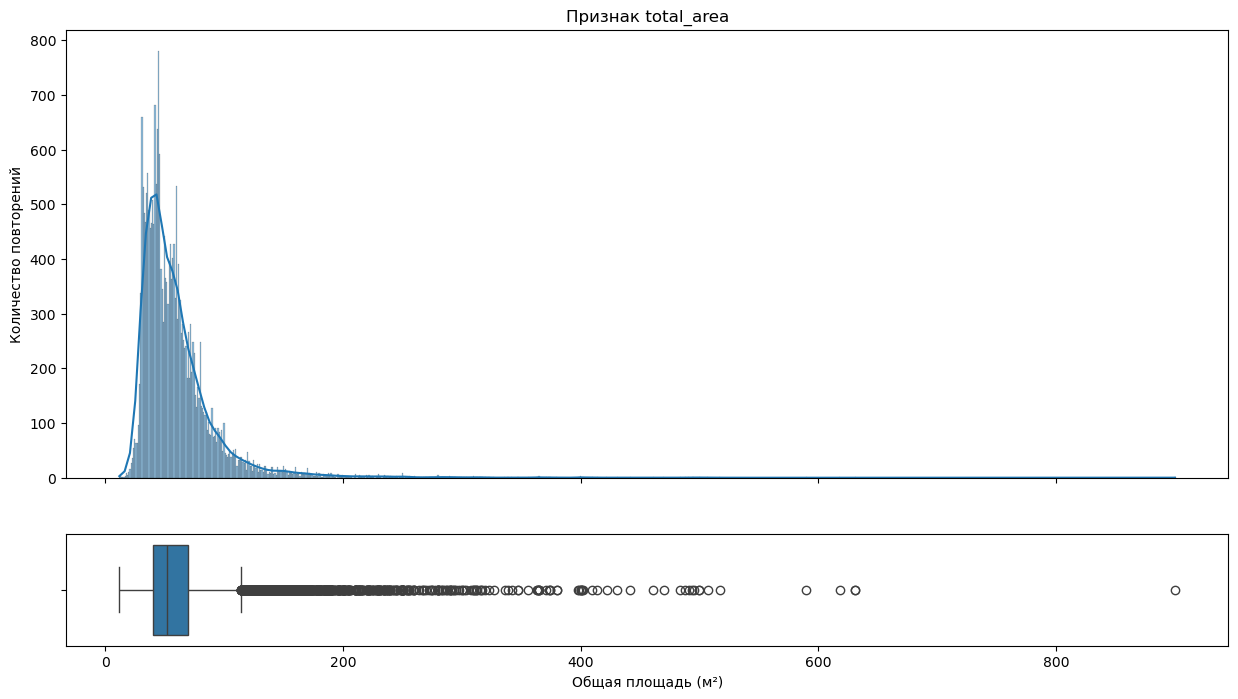

In [122]:
# вызываем ф-ю для построения для построения гистрограммы и диаграммы размаха для числовых признаков
build_hist_boxplot(data, 'total_area', 'Признак total_area', 'Общая площадь (м²)')

In [123]:
data['total_area'].describe()

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

Большая часть значений лежит  до 70 кв.метров. Минимальное значение 12 кв. метров подозрительно для квартиры, но такие случаи есть, возможно это комната в общажитии или особенность планировки.

Очень много выбросов данных.Скорей всего огромные площади это ошибка при заполнении данных, хотя есть примеры когда квартиры имеют действительно очень большую площадь.

Будем ориентироваться на СНиП, СП, СанПин, ПП, различными постановлениями Госстрой и ВСН.

В соответствии с ними, площадь квартир должна быть не менее следующих параметров:

- 28 м2 для «однушек»;
- 44 м2 для «двушек»;
- 56 м2 для «трешек»;
- 70 м2 для четырехкомнатных квартир;
- 84 м2 для пятикомнатных и т. д. д.



In [125]:
data.query('total_area < 28').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_category,pub_date,price_square_meter,day_week_pub,month_pub,year_pub,type_apartment_floor,cityCenters_nearest_in_km
114,5,4000000.0,21.40,2019-02-07T00:00:00,1,2.90,8.0,8.300000,7,False,False,False,6.3,0.0,Санкт-Петербург,27089.0,5791.0,2.0,488.0,1.0,286.0,NaN,город,2019-02-07,186915.89,3,2,2019,другой,6.0
144,1,2450000.0,27.00,2017-03-30T00:00:00,0,2.65,24.0,15.500000,2,False,True,False,9.1,2.0,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0,поселок,2017-03-30,90740.74,3,3,2017,другой,NaN
320,6,2000000.0,25.00,2017-02-07T00:00:00,1,2.65,5.0,14.423077,5,False,False,False,9.1,0.0,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,45.0,город,2017-02-07,80000.00,1,2,2017,последний,NaN
347,4,2320000.0,25.00,2017-09-27T00:00:00,0,2.65,14.0,17.000000,1,False,False,True,9.1,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0,деревня,2017-09-27,92800.00,2,9,2017,первый,NaN
438,8,2480000.0,27.11,2018-03-12T00:00:00,0,2.65,17.0,24.750000,4,False,True,False,9.1,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0,город,2018-03-12,91479.16,0,3,2018,другой,15.0


Таких данных в принципе немного(меньше 2%), поэтому не будем их учитывать.

Вывод: Большая часть значений лежит  до 70 кв.метров. Очень много выбросов, но нет четких оснований полагать,что данные неверны, вполне возможны квартиры с большой площадью.

**Исследовательский анализ данных столбца 'living_area'**

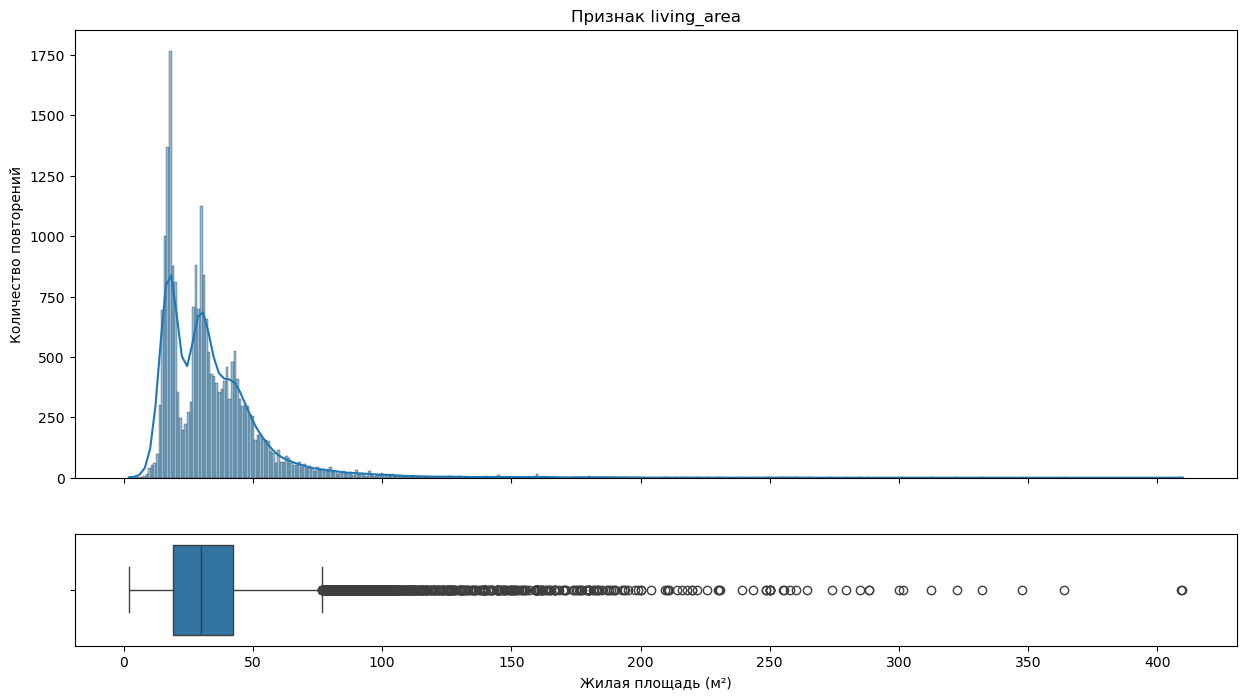

In [129]:
# вызываем ф-ю для построения для построения гистрограммы и диаграммы размаха для числовых признаков
build_hist_boxplot(data, 'living_area', 'Признак living_area', 'Жилая площадь (м²)')

In [130]:
data['living_area'].describe()

count    23565.000000
mean        34.621108
std         22.399827
min          2.000000
25%         19.000000
50%         30.000000
75%         42.115385
max        409.700000
Name: living_area, dtype: float64

Большая часть значений лежит до 43 кв.м. Много выбросов. Есть слишком маленькие площади жилой площади, нужно понять возможно ли такое. Если ссылаться на СНиП то жилая площадь не может быть такой маленькой, здесь явно что то не так.

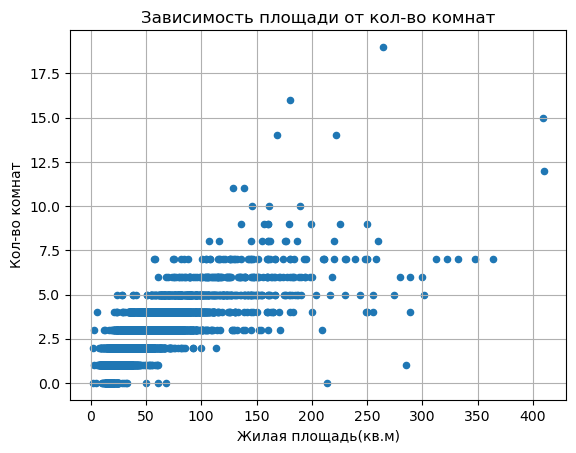

In [132]:
#Посмотрим есть ли зависимтость между кол-ом комнат и жилой площади
data.plot(x = 'living_area', y = 'rooms', kind = 'scatter', grid = True, 
          title = 'Зависимость площади от кол-во комнат', xlabel = 'Жилая площадь(кв.м)',  ylabel = 'Кол-во комнат' )
plt.show()

In [133]:
# коэфф. корреляции Пирсона
data['living_area'].corr(data['rooms'])

0.8271329898864682

С увеличением кол-во комнат растёт жилая площадь, но есть исключения: комнат мало, а площадь большая, возможно это студия, или свободная планировка.

Кол-во комнат 0
count    194.000000
mean      19.668485
std       15.433436
min        2.000000
25%       16.000000
50%       18.000000
75%       19.750000
max      214.038462
Name: living_area, dtype: float64


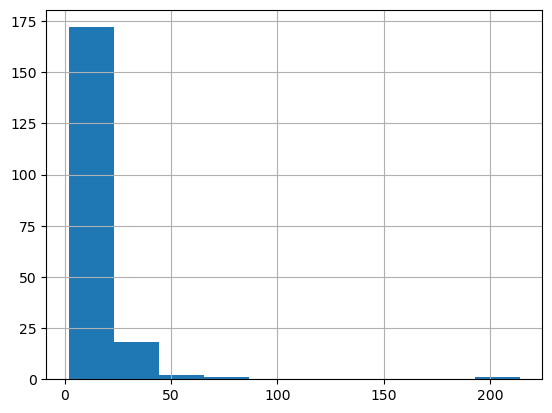

Кол-во комнат 1
count    8004.000000
mean       18.289639
std         4.899140
min         3.000000
25%        16.100000
50%        17.884615
75%        19.300000
max       285.057692
Name: living_area, dtype: float64


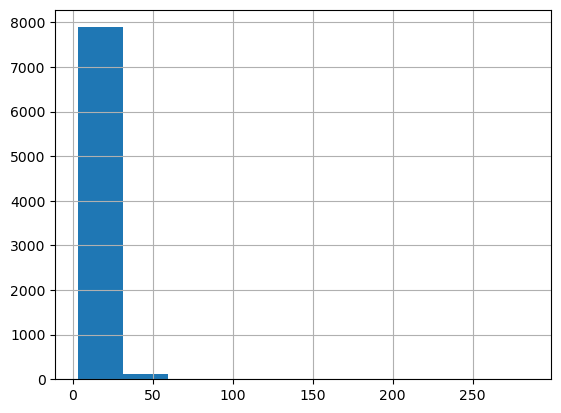

Кол-во комнат 2
count    7897.000000
mean       31.823047
std         6.464350
min         2.000000
25%        28.000000
50%        30.500000
75%        34.000000
max       113.076923
Name: living_area, dtype: float64


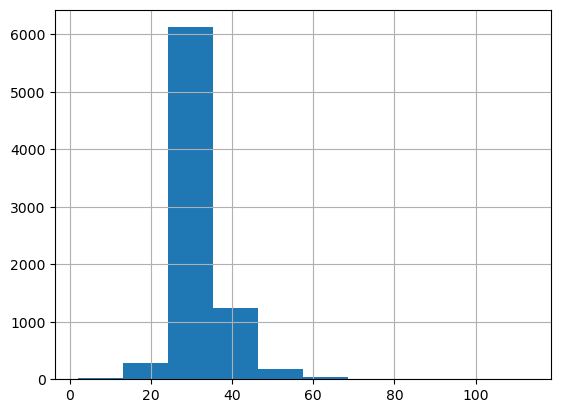

Кол-во комнат 3
count    5779.000000
mean       47.359083
std        11.961097
min         3.000000
25%        40.900000
50%        44.900000
75%        51.300000
max       209.480769
Name: living_area, dtype: float64


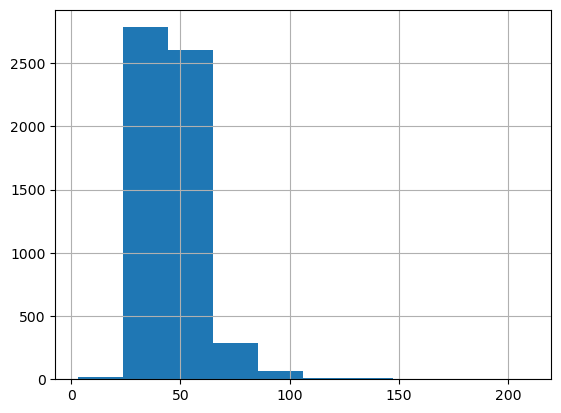

Кол-во комнат 4
count    1172.000000
mean       67.115477
std        24.901115
min         5.400000
25%        52.000000
50%        63.400000
75%        76.463942
max       288.461538
Name: living_area, dtype: float64


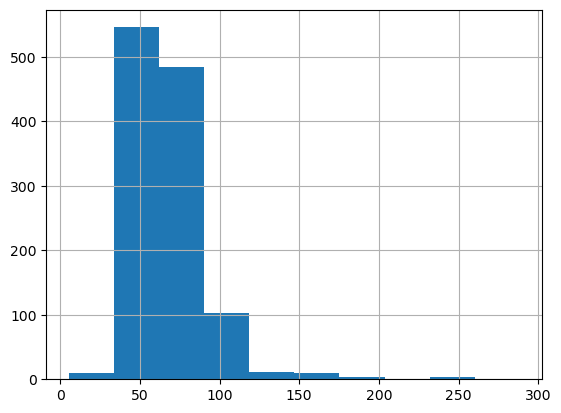

Кол-во комнат 5
count    325.000000
mean     100.077680
std       38.045028
min       23.600000
25%       75.800000
50%       91.200000
75%      117.100000
max      301.500000
Name: living_area, dtype: float64


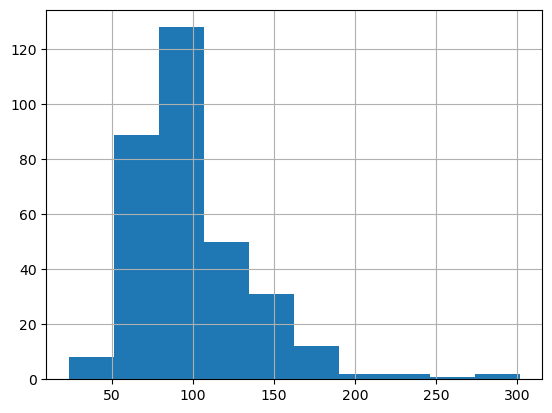

Кол-во комнат 6
count    104.000000
mean     131.659349
std       44.627280
min       61.153846
25%      101.000000
50%      123.435000
75%      156.500000
max      300.000000
Name: living_area, dtype: float64


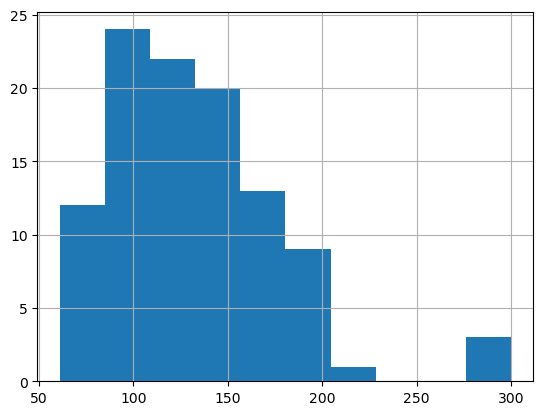

Кол-во комнат 7
count     59.000000
mean     167.101304
std       72.353907
min       57.400000
25%      118.350000
50%      147.200000
75%      210.490385
max      364.038462
Name: living_area, dtype: float64


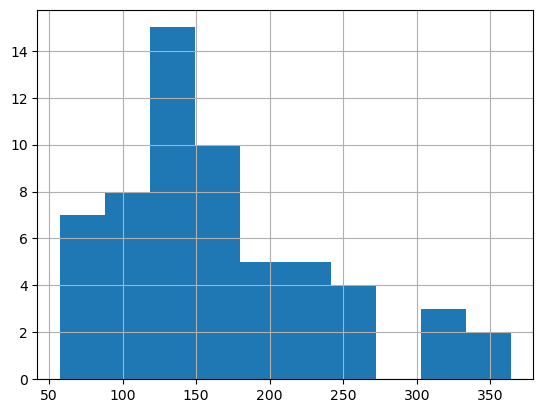

Кол-во комнат 8
count     12.000000
mean     168.683333
std       41.550623
min      107.000000
25%      152.400000
50%      161.000000
75%      179.200000
max      260.000000
Name: living_area, dtype: float64


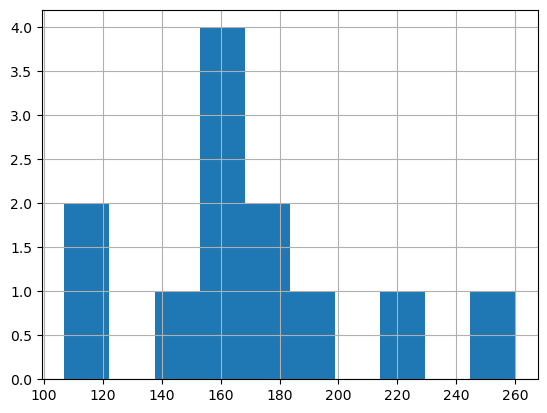

Кол-во комнат 9
count      8.000000
mean     183.422115
std       38.821097
min      135.576923
25%      159.325000
50%      169.900000
75%      205.725000
max      250.000000
Name: living_area, dtype: float64


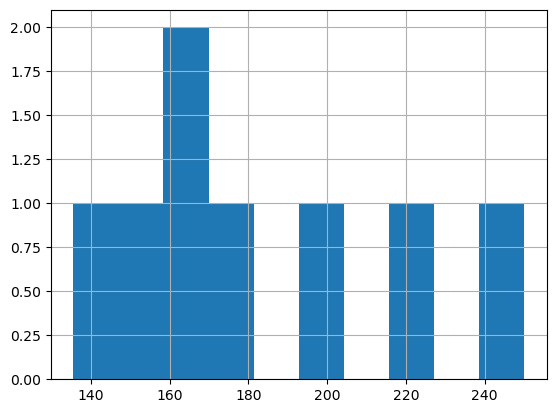

Кол-во комнат 10
count      3.000000
mean     165.566667
std       22.047298
min      145.900000
25%      153.650000
50%      161.400000
75%      175.400000
max      189.400000
Name: living_area, dtype: float64


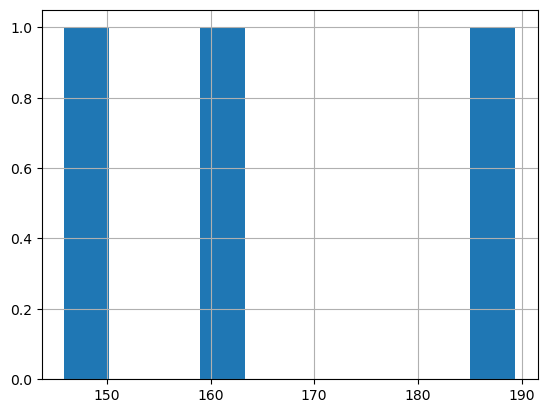

Кол-во комнат 11
count      2.000000
mean     133.900000
std        6.929646
min      129.000000
25%      131.450000
50%      133.900000
75%      136.350000
max      138.800000
Name: living_area, dtype: float64


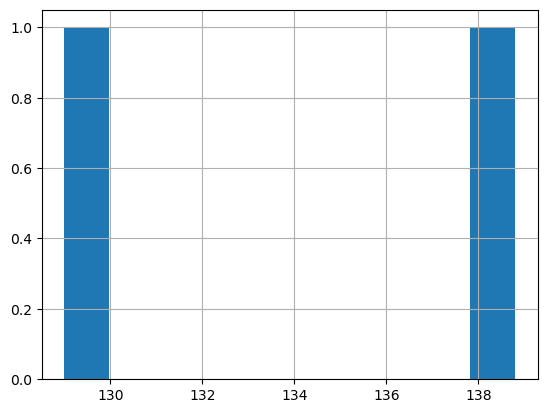

Кол-во комнат 12
count      1.0
mean     409.7
std        NaN
min      409.7
25%      409.7
50%      409.7
75%      409.7
max      409.7
Name: living_area, dtype: float64


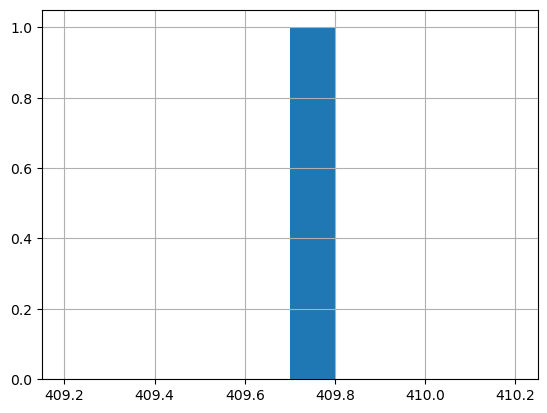

Кол-во комнат 14
count      2.000000
mean     195.150000
std       37.971634
min      168.300000
25%      181.725000
50%      195.150000
75%      208.575000
max      222.000000
Name: living_area, dtype: float64


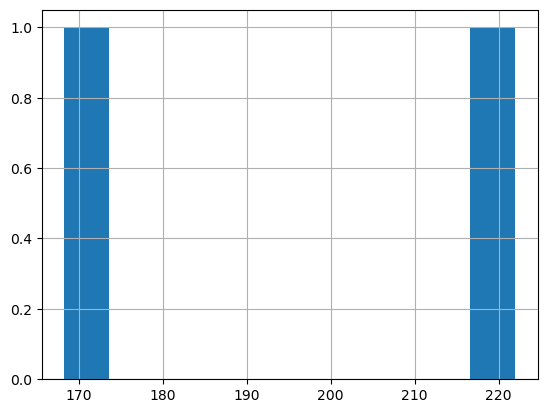

Кол-во комнат 15
count      1.0
mean     409.0
std        NaN
min      409.0
25%      409.0
50%      409.0
75%      409.0
max      409.0
Name: living_area, dtype: float64


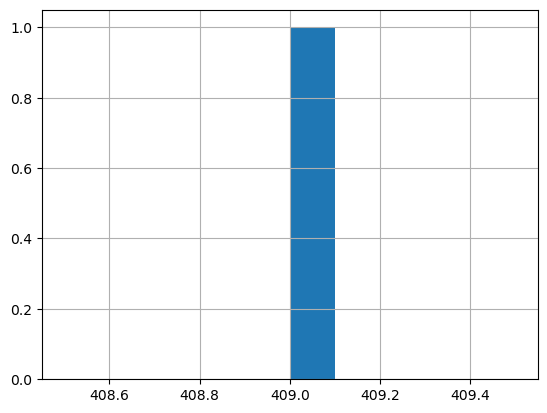

Кол-во комнат 16
count      1.0
mean     180.0
std        NaN
min      180.0
25%      180.0
50%      180.0
75%      180.0
max      180.0
Name: living_area, dtype: float64


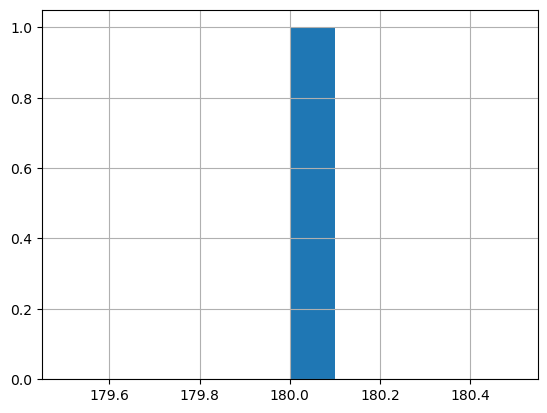

Кол-во комнат 19
count      1.0
mean     264.5
std        NaN
min      264.5
25%      264.5
50%      264.5
75%      264.5
max      264.5
Name: living_area, dtype: float64


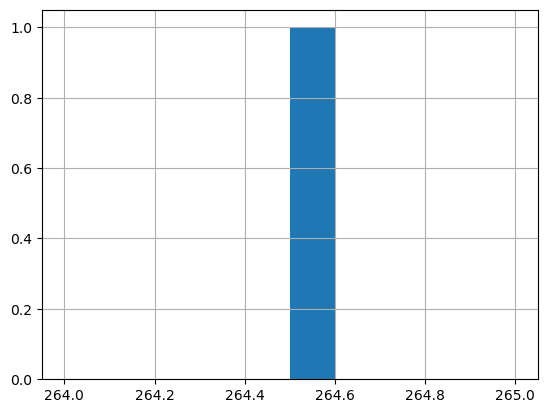

In [135]:
#Проеверим как изменяются значения жилой площади от кол-во комнат
for i in data['rooms'].sort_values().unique():
    print('Кол-во комнат {i}'.format(i = i))
    print(data.loc[data['rooms'] == i, 'living_area'].describe())
    data.loc[data['rooms'] == i, 'living_area'].hist()
    plt.show()

Явно прослеживается связь кол-во комнат и жилой площади. 

Попадаются аномальные значения, которые сильно отличаются от среднего и медианы.

Есть единичные случаи с большим кол-ом комнат и большой площадью, что вполне реалньно.

Видно, что медиана не меньше 17 кв.метров у каждой группы, из этого следует, что слишком маленькие площади это какие это аномалии, скорей всего 
то коммунальные квартиры.


Согласно нормативам:
Yчeтнaя нopмaтивнaя плoщaдь жилoгo пoмeщeния нa 1 чeлoвeкa cocтaвляeт: 

для гpaждaн в oтдeльнoй квapтиpы — 9 кв.м.;

нa 1 чeлoвeкa в кoммyнaлкe — oт 6 дo 15 кв.м.;e/


In [137]:
#Найдем слишком маленькие жилые площади
data.query('living_area < 6')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_category,pub_date,price_square_meter,day_week_pub,month_pub,year_pub,type_apartment_floor,cityCenters_nearest_in_km
3228,7,4440000.0,41.0,2017-07-02T00:00:00,1,2.65,17.0,3.0,17,False,False,False,11.0,0.0,Санкт-Петербург,19272.0,13073.0,0.0,NaN,0.0,NaN,216.0,город,2017-07-02,108292.68,6,7,2017,последний,13.0
13837,20,6350000.0,52.0,2018-02-06T00:00:00,2,3.00,6.0,2.0,2,False,False,False,9.0,0.0,Санкт-Петербург,32453.0,6521.0,0.0,NaN,1.0,1012.0,91.0,город,2018-02-06,122115.38,1,2,2018,другой,7.0
17483,11,2680000.0,22.0,2018-08-11T00:00:00,0,2.65,25.0,5.0,8,False,True,False,9.1,2.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,70.0,город,2018-08-11,121818.18,5,8,2018,другой,12.0
21634,0,2330000.0,23.0,2018-01-01T00:00:00,0,2.65,24.0,2.0,22,False,True,False,9.1,0.0,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,66.0,поселок,2018-01-01,101304.35,0,1,2018,другой,NaN
21818,15,6100000.0,77.6,2019-02-28T00:00:00,4,2.50,9.0,5.4,1,False,False,False,9.8,0.0,Санкт-Петербург,29338.0,11270.0,1.0,584.0,0.0,NaN,33.0,город,2019-02-28,78608.25,3,2,2019,первый,11.0
23442,14,64990000.0,139.0,2015-11-24T00:00:00,3,3.00,8.0,3.0,8,False,False,False,16.0,1.0,Санкт-Петербург,33255.0,5975.0,1.0,630.0,3.0,100.0,280.0,город,2015-11-24,467553.96,1,11,2015,последний,6.0


При большой общей площади и маленькой жилой площади это скорей всего коммунальные квартиры.

По закону положено от 6 кв.м в комуналке, в нашем случае здесь либо нарушение правил, либо просто неверные данные.

В некоторых строках при малой жилой площади очень большая цена, это странно.

Таких данные немного, поэтому их не будем учитывать.

**Исследовательский анализ данных столбца 'kitchen_area'**

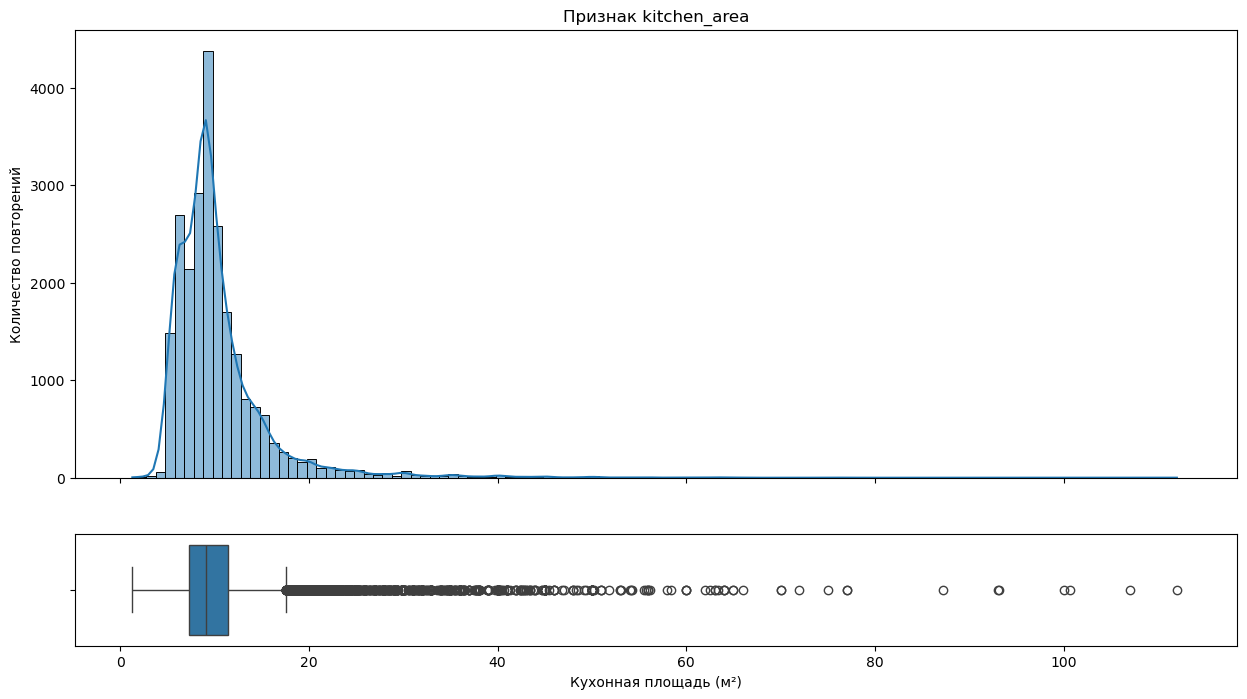

In [140]:
# вызываем ф-ю для построения для построения гистрограммы и диаграммы размаха для числовых признаков
build_hist_boxplot(data, 'kitchen_area', 'Признак kitchen_area', 'Кухонная площадь (м²)')

In [141]:
data['kitchen_area'].describe()

count    23565.000000
mean        10.423234
std          5.631746
min          1.300000
25%          7.300000
50%          9.100000
75%         11.410000
max        112.000000
Name: kitchen_area, dtype: float64

Большинство значений до 12 кв.метров. Нужно проверить нулевые значение и слишком большие.

Согласно СП 54.13330.2016, минимальная площадь кухни в муниципальном жилье:

в однокомнатных квартирах — 5 м² 2;
в остальных — 8 м² 2.

In [143]:
data.query('kitchen_area < 5').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_category,pub_date,price_square_meter,day_week_pub,month_pub,year_pub,type_apartment_floor,cityCenters_nearest_in_km
76,12,2800000.0,55.1,2016-05-14T00:00:00,3,2.60,5.0,38.4,1,False,False,False,4.9,0.0,Кировск,NaN,NaN,NaN,NaN,NaN,NaN,606.0,город,2016-05-14,50816.70,5,5,2016,первый,NaN
296,9,2650000.0,42.8,2017-04-25T00:00:00,2,2.65,5.0,30.0,3,False,False,False,4.5,0.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,49.0,город,2017-04-25,61915.89,1,4,2017,другой,NaN
420,8,1700000.0,55.2,2018-03-24T00:00:00,3,2.50,5.0,38.5,5,False,False,False,4.5,0.0,Кириши,NaN,NaN,NaN,NaN,NaN,NaN,NaN,город,2018-03-24,30797.10,5,3,2018,последний,NaN
902,15,2600000.0,27.0,2017-07-10T00:00:00,1,2.75,23.0,18.0,18,False,False,False,2.0,0.0,Санкт-Петербург,22131.0,17459.0,0.0,NaN,1.0,411.0,10.0,город,2017-07-10,96296.30,0,7,2017,другой,17.0
1322,6,2650000.0,46.2,2016-12-01T00:00:00,2,2.50,5.0,29.2,5,False,False,False,4.9,0.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,704.0,город,2016-12-01,57359.31,3,12,2016,последний,NaN


Данных немного, так что можно ими пренебречь.

In [145]:
data.query('kitchen_area > 50').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_category,pub_date,price_square_meter,day_week_pub,month_pub,year_pub,type_apartment_floor,cityCenters_nearest_in_km
489,18,95000000.0,216.0,2017-12-05T00:00:00,4,3.00,5.0,86.000000,4,False,False,False,77.0,0.0,Санкт-Петербург,21740.0,436.0,2.0,138.0,3.0,620.0,14.0,город,2017-12-05,439814.81,1,12,2017,другой,0.0
1022,20,155000000.0,310.0,2018-10-12T00:00:00,5,5.30,3.0,190.000000,3,False,False,False,63.0,2.0,Санкт-Петербург,24899.0,4785.0,0.0,NaN,1.0,603.0,NaN,город,2018-10-12,500000.00,4,10,2018,последний,5.0
1081,16,75000000.0,323.0,2017-07-10T00:00:00,5,4.00,5.0,255.700000,4,False,False,False,66.0,0.0,Санкт-Петербург,23713.0,594.0,3.0,398.0,2.0,515.0,259.0,город,2017-07-10,232198.14,0,7,2017,другой,1.0
2480,9,12500000.0,255.0,2017-04-21T00:00:00,3,2.65,2.0,153.900000,2,False,False,False,100.7,0.0,Санкт-Петербург,29544.0,6916.0,0.0,NaN,3.0,198.0,102.0,город,2017-04-21,49019.61,4,4,2017,последний,7.0
3103,19,140000000.0,631.0,2019-03-30T00:00:00,7,2.65,5.0,364.038462,5,False,False,False,60.0,0.0,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN,город,2019-03-30,221870.05,5,3,2019,последний,5.0


Данных с большой площадью кухни также немного. В принципе у кухни нет ограничения максимальному размеру. Скорей всего это особенность планировки.

В итоге можно отбросить ряд данных(меньше 3%) по площадям которые не соответствуют ГОСТ.

In [148]:
#Создадим переменную которая будет учитывать площади соглгасно ГОСТ
gost_apartments = data.query('kitchen_area >= 5 and living_area >= 6 and total_area >= 28')

In [149]:
#Проверим сколько осталось данных(было 23699)
gost_apartments.shape

(23105, 30)

**Исследовательский анализ данных столбца 'last_price'**

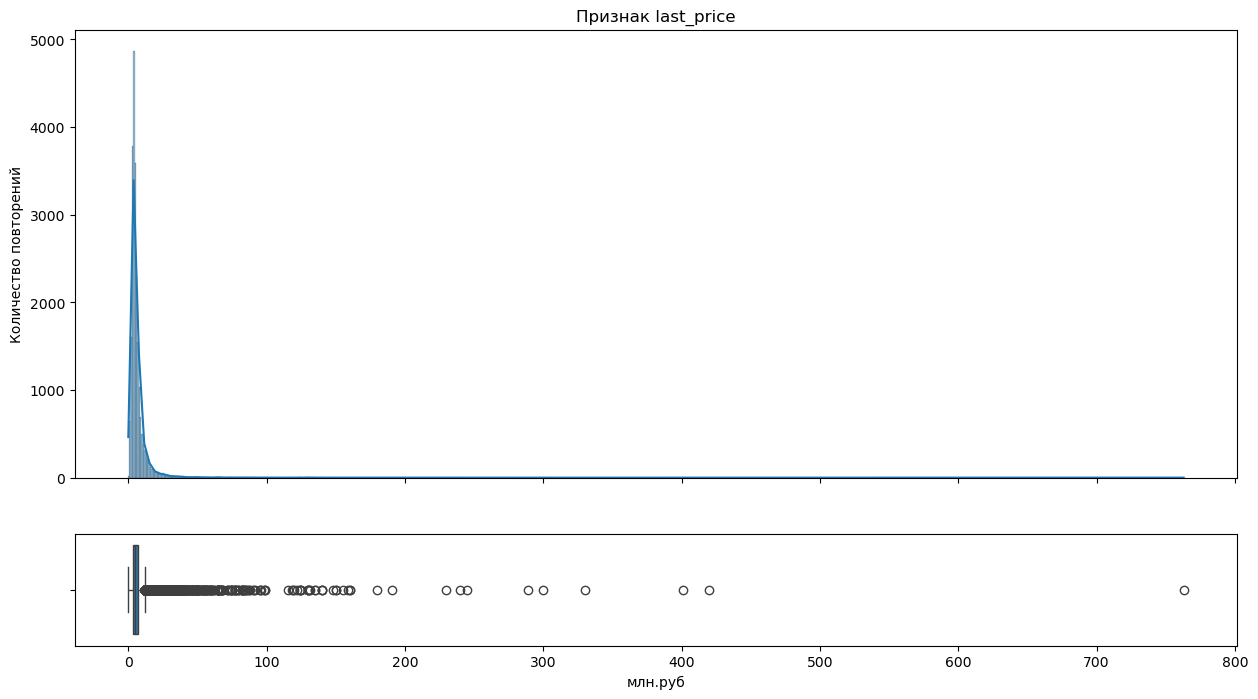

In [151]:
# вызываем ф-ю для построения для построения гистрограммы и диаграммы размаха для числовых признаков
build_hist_boxplot(gost_apartments[['last_price']]/1000000, 'last_price', 'Признак last_price', 'млн.руб')

In [152]:
(gost_apartments[['last_price']]/1000000).describe()

,last_price
count,23105.000000
mean,6.611347
std,10.997917
min,0.012190
25%,3.500000
50%,4.700000
75%,6.800000
max,763.000000


Большинство значений до 6.8 миллионов.

Слишком дешевые квартиры подозрительны, надо проверять.

Очень дорогие квартиры реальны, но лучше проверить.

In [154]:
display(gost_apartments.query('last_price < 1000000').head())
display(gost_apartments.query('last_price < 1000000').shape)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_category,pub_date,price_square_meter,day_week_pub,month_pub,year_pub,type_apartment_floor,cityCenters_nearest_in_km
164,6,800000.0,40.3,2018-06-25T00:00:00,2,2.65,3.0,23.250000,1,False,False,False,9.1,2.0,поселок городского типа Ефимовский,NaN,NaN,NaN,NaN,NaN,NaN,81.0,ПГТ,2018-06-25,19851.12,0,6,2018,первый,NaN
245,7,650000.0,31.0,2017-01-20T00:00:00,1,2.65,3.0,17.884615,1,False,False,False,9.1,0.0,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,378.0,город,2017-01-20,20967.74,4,1,2017,первый,NaN
257,6,900000.0,30.0,2017-11-21T00:00:00,1,2.50,5.0,15.000000,4,False,False,False,5.0,1.0,Ивангород,NaN,NaN,NaN,NaN,NaN,NaN,NaN,город,2017-11-21,30000.00,1,11,2017,другой,NaN
266,7,650000.0,46.0,2018-03-15T00:00:00,2,2.50,5.0,30.000000,5,False,False,False,7.0,0.0,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,75.0,город,2018-03-15,14130.43,3,3,2018,последний,NaN
291,2,900000.0,42.8,2017-06-14T00:00:00,2,2.65,5.0,32.000000,5,False,False,False,5.0,0.0,Сясьстрой,NaN,NaN,NaN,NaN,NaN,NaN,247.0,город,2017-06-14,21028.04,2,6,2017,последний,NaN


(216, 30)

In [155]:
#Проверим в каких населенных пунтках дешевые квартиры
gost_apartments.query('last_price < 1000000')[['locality_name_category','locality_name']].value_counts()

locality_name_category  locality_name          
город                   Сланцы                     82
                        Бокситогорск               14
                        Пикалево                   11
                        Ивангород                   5
                        Выборг                      4
                                                   ..
деревня                 деревня Малая Романовка     1
                        деревня Пельгора            1
                        деревня Пустынка            1
                        деревня Сижно               1
село                    село Паша                   1
Name: count, Length: 69, dtype: int64

В небольших населенных пунктах небольшая цена ещё логична, но таких случаев единицы. Странно, что в основном такие кваритры в городах. Скорей всего это какие-то коммунальные квартиры, общажития или вообще аварийные.

Данных не так много, не будем учитывать слишком дешевые квартиры.

In [157]:
#Добавим в переменную gost_area новое условие
gost_apartments = gost_apartments.query('last_price > 1000000')

In [158]:
gost_apartments.shape

(22870, 30)

In [159]:
#Оценим квартиры дороже 10 млн.
display(gost_apartments.query('last_price > 10000000').head())
display(gost_apartments.query('last_price > 10000000').shape)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_category,pub_date,price_square_meter,day_week_pub,month_pub,year_pub,type_apartment_floor,cityCenters_nearest_in_km
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.000000,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,город,2019-03-07,120370.37,3,3,2019,другой,16.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,91.730769,9,False,False,False,9.1,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,город,2015-07-24,408176.10,4,7,2015,другой,7.0
19,16,14200000.0,121.0,2019-01-09T00:00:00,3,2.75,16.0,76.000000,8,False,False,False,12.0,0.0,Санкт-Петербург,38900.0,12843.0,0.0,NaN,0.0,NaN,97.0,город,2019-01-09,117355.37,2,1,2019,другой,13.0
35,6,15500000.0,149.0,2017-06-26T00:00:00,5,2.65,5.0,104.000000,4,False,False,False,17.0,0.0,Санкт-Петербург,23670.0,3502.0,0.0,NaN,1.0,779.0,644.0,город,2017-06-26,104026.85,0,6,2017,другой,4.0
42,13,22000000.0,161.8,2015-07-08T00:00:00,4,2.80,4.0,80.900000,2,False,False,False,17.6,5.0,Петергоф,35416.0,30605.0,2.0,47.0,1.0,907.0,987.0,город,2015-07-08,135970.33,2,7,2015,другой,31.0


(2694, 30)

In [160]:
#Оценим в каких населенных пунктах дорогие квартиры
gost_apartments.query('last_price > 10000000')[['locality_name_category','locality_name']].value_counts()

locality_name_category  locality_name          
город                   Санкт-Петербург            2594
                        Пушкин                       38
                        Сестрорецк                   17
                        Петергоф                      8
                        Павловск                      4
                        Всеволожск                    4
                        Зеленогорск                   3
поселок                 поселок Стрельна              3
                        поселок Шушары                3
город                   Кронштадт                     2
                        Кудрово                       2
                        Красное Село                  2
                        Колпино                       2
                        Гатчина                       2
деревня                 деревня Кудрово               2
поселок                 поселок Репино                2
город                   Выборг                        1


In [161]:
#Оценим ряд данных чтобы понять какие есть аномалии
gost_apartments.query('last_price > 10000000')[['rooms','total_area', 'living_area','locality_name_category']].describe()

,rooms,total_area,living_area
count,2694.000000,2694.000000,2694.000000
mean,3.386785,124.029091,71.256767
std,1.421673,63.923462,40.476499
min,0.000000,31.000000,10.500000
25%,3.000000,87.000000,47.821154
50%,3.000000,107.000000,60.250000
75%,4.000000,140.550000,82.400000
max,19.000000,900.000000,409.700000


Маленькая площадь как общая так и жилая, нет комнат, но при этом большая цена, это странно. 

In [163]:
gost_apartments.query('last_price > 10000000 and total_area < 50')[['rooms','total_area', 'living_area', 'locality_name', 'last_price', 'cityCenters_nearest','parks_around3000' ]]

,rooms,total_area,living_area,locality_name,last_price,cityCenters_nearest,parks_around3000
2677,2,45.70,23.700000,Санкт-Петербург,10400000.0,2144.0,3.0
4690,2,45.00,29.000000,Санкт-Петербург,16000000.0,4324.0,1.0
4835,1,33.00,19.038462,Санкт-Петербург,28000000.0,1376.0,3.0
7704,1,48.00,25.000000,Санкт-Петербург,11500000.0,583.0,2.0
9648,1,49.70,28.673077,Санкт-Петербург,19500000.0,4624.0,1.0
10140,1,45.00,25.961538,Санкт-Петербург,16000000.0,5331.0,2.0
10942,2,47.00,24.000000,Санкт-Петербург,10400000.0,2144.0,3.0
12283,1,47.00,22.000000,Санкт-Петербург,12500000.0,15577.0,2.0
14655,1,31.00,17.884615,Санкт-Петербург,12000000.0,1500.0,3.0
17075,1,33.00,19.038462,Санкт-Петербург,28000000.0,1462.0,3.0


В основном такие аномалии в Санкт-Петербурге. Возможно это как то связано с близким распложением к центру, дом выского качества или что то в пододном духе.

В общем нет четких обоснований удалять такие данные.

In [165]:
#Проверим квартиры изменив диапазон по цене выше 100 млн
gost_apartments.query('last_price > 100000000')[['rooms','total_area', 'living_area', 'locality_name', \
                                                 'last_price', 'cityCenters_nearest','parks_around3000','is_apartment' ]]

,rooms,total_area,living_area,locality_name,last_price,cityCenters_nearest,parks_around3000,is_apartment
789,4,310.0,250.000000,Санкт-Петербург,135000000.0,7251.0,2.0,False
1022,5,310.0,190.000000,Санкт-Петербург,155000000.0,4785.0,0.0,False
1183,6,290.6,188.700000,Санкт-Петербург,118000000.0,6224.0,1.0,False
1295,5,280.0,162.000000,Санкт-Петербург,120000000.0,4247.0,1.0,False
1431,3,190.0,95.000000,Санкт-Петербург,330000000.0,1197.0,3.0,False
1922,4,224.5,163.500000,Санкт-Петербург,125000000.0,2335.0,0.0,False
2235,5,304.0,175.384615,Санкт-Петербург,130278280.0,5913.0,2.0,False
2527,4,242.4,131.000000,Санкт-Петербург,159984000.0,2242.0,1.0,False
3103,7,631.0,364.038462,Санкт-Петербург,140000000.0,4972.0,0.0,False
4971,4,124.5,67.200000,Санкт-Петербург,124000000.0,1722.0,3.0,False


In [166]:
gost_apartments.query('last_price > 100000000')[['rooms','total_area', 'living_area', 'locality_name', 'last_price']].describe()

,rooms,total_area,living_area,last_price
count,37.000000,37.000000,37.000000,3.700000e+01
mean,5.216216,329.329730,185.032827,1.920268e+08
std,1.857943,161.213347,83.063170,1.244244e+08
min,2.000000,124.500000,36.000000,1.154900e+08
25%,4.000000,235.000000,139.038462,1.300000e+08
50%,5.000000,280.000000,179.000000,1.400000e+08
75%,6.000000,400.000000,220.000000,1.908700e+08
max,12.000000,900.000000,409.700000,7.630000e+08


В итоге слишком дорогие квартиры оставим, так как их не так много, наблюдается связь  площади и цены и кол-во комнат.

**Исследовательский анализ данных столбца 'rooms'**

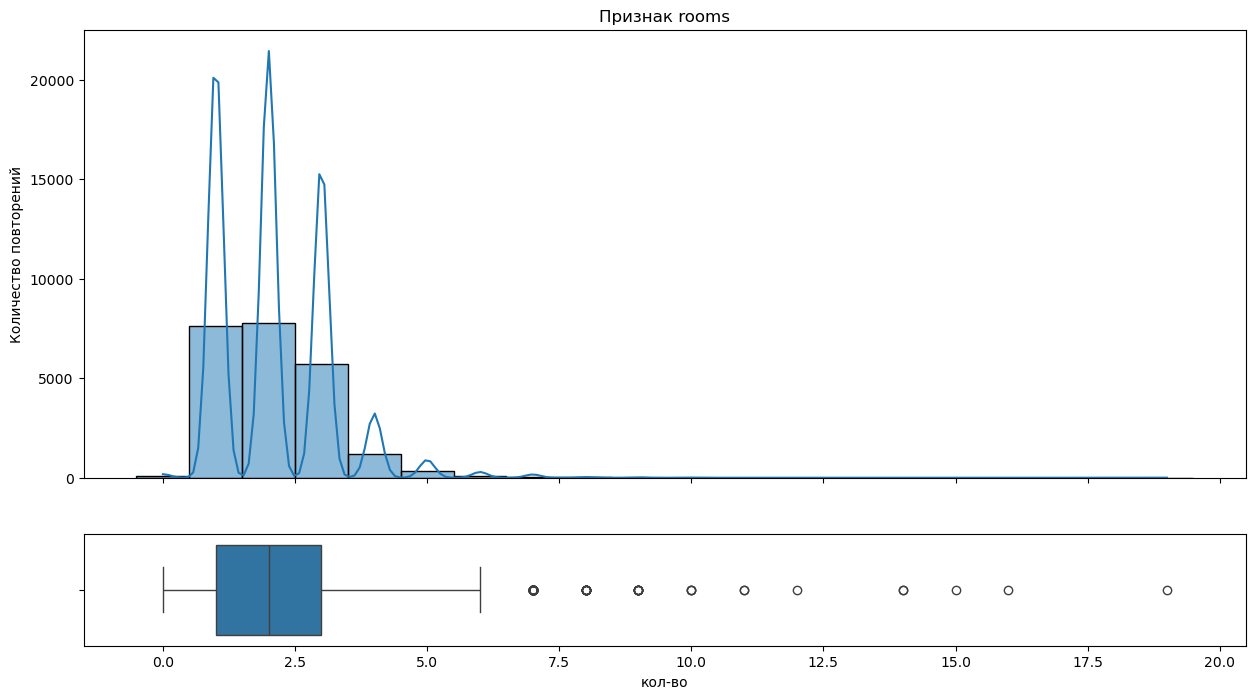

In [169]:
# вызываем ф-ю для построения для построения гистрограммы и диаграммы размаха для числовых признаков
build_hist_boxplot(gost_apartments, 'rooms', 'Признак rooms', 'кол-во')

In [170]:
gost_apartments['rooms'].describe()

count    22870.000000
mean         2.098164
std          1.073588
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Большинство комнат до 3. Проверим слишком маленькие и большие значения.

0 комнат скорей всего связано с квартирой студией или особенностью планировки.

In [172]:
display(gost_apartments.query('rooms < 1 or studio == True or open_plan == True').head())
display(gost_apartments.query('rooms < 1 or studio == True or open_plan == True').shape)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_category,pub_date,price_square_meter,day_week_pub,month_pub,year_pub,type_apartment_floor,cityCenters_nearest_in_km
505,0,3375000.0,34.4,2017-03-28T00:00:00,0,2.65,26.0,24.3,19,False,False,True,9.1,1.0,поселок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0,поселок,2017-03-28,98110.47,1,3,2017,другой,19.0
835,14,1900000.0,35.0,2017-04-14T00:00:00,0,2.70,5.0,15.0,3,False,False,True,9.1,1.0,поселок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,7.0,поселок,2017-04-14,54285.71,4,4,2017,другой,NaN
1168,12,3240000.0,29.0,2018-10-30T00:00:00,0,2.65,24.0,17.0,2,False,True,False,9.1,2.0,Санкт-Петербург,35129.0,16293.0,0.0,NaN,1.0,475.0,13.0,город,2018-10-30,111724.14,1,10,2018,другой,16.0
1169,3,3900000.0,32.0,2016-10-18T00:00:00,0,2.70,24.0,18.0,2,False,True,False,9.1,2.0,Санкт-Петербург,44754.0,8409.0,1.0,609.0,0.0,NaN,540.0,город,2016-10-18,121875.00,1,10,2016,другой,8.0
1374,3,6000000.0,44.2,2015-11-10T00:00:00,1,2.65,25.0,17.4,23,False,False,True,9.1,1.0,Санкт-Петербург,10663.0,12738.0,0.0,NaN,0.0,NaN,231.0,город,2015-11-10,135746.61,1,11,2015,другой,13.0


(77, 30)

In [173]:
gost_apartments.query('rooms < 1 and studio == False and open_plan == False')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_category,pub_date,price_square_meter,day_week_pub,month_pub,year_pub,type_apartment_floor,cityCenters_nearest_in_km


Квартиры со свободной планировкой или типа - студия, могут быть без комнат.

In [175]:
#Проверим есть ли квартиры студии с большим кол-ом комнат
gost_apartments.query('rooms > 4 and studio == True')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_category,pub_date,price_square_meter,day_week_pub,month_pub,year_pub,type_apartment_floor,cityCenters_nearest_in_km


Все логично, таких данных нет.

По ГОСТ если комнат 5 и более то общая площадь должна быть не меньше 84 кв.м

In [178]:
#Проверим есть ли квартиры где больше 5 комнат и площадь меньше 84
gost_apartments.query('rooms > 5 and total_area < 84')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_category,pub_date,price_square_meter,day_week_pub,month_pub,year_pub,type_apartment_floor,cityCenters_nearest_in_km


Таких данных нет. 

В общем кол-во комнат может быть большим и вообще отсутствовать.

**Исследовательский анализ данных столбца 'ceiling_height'**

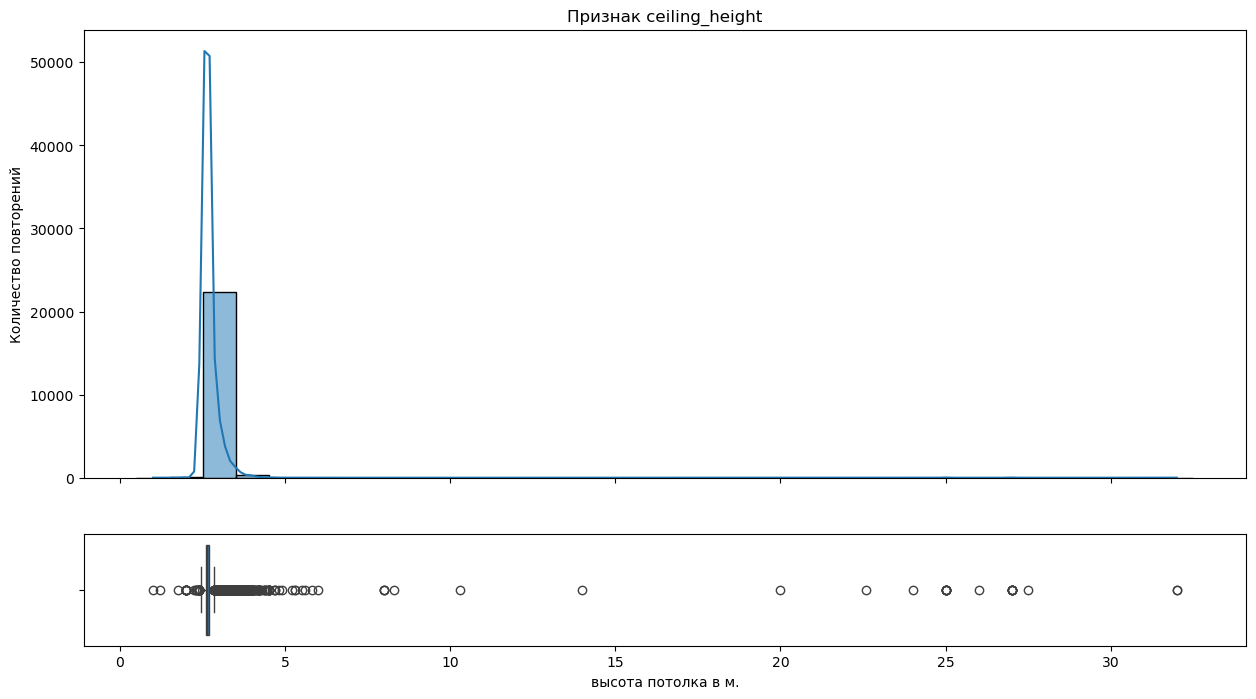

In [181]:
# вызываем ф-ю для построения для построения гистрограммы и диаграммы размаха для числовых признаков
build_hist_boxplot(gost_apartments, 'ceiling_height', 'Признак ceiling_height', 'высота потолка в м.')

In [182]:
gost_apartments['ceiling_height'].describe()

count    22870.000000
mean         2.721278
std          0.756006
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         32.000000
Name: ceiling_height, dtype: float64

Высота потолоков в квартирах в основном до 2.7 м.

Слишком много выбросов, и есть маленькие значение.

В современной застройке чаще всего она не превышает 3,2 метра. В старых домах с увеличенными габаритами и площадью потолки могут быть 4 метра высотой и более.
Минимальные значения высоты потолка в многоквартирных домах установлены СНиП 31-01-2003:
в центральной части России — не ниже 2,5 метра;
в Сибири, на Дальнем Востоке и на севере Центральной России — не ниже 2,7 метра.


Для начала исправим слишком большие значения, начиная от 10 и до 32.

In [185]:
gost_apartments.loc[(gost_apartments['ceiling_height'] >= 10) & (gost_apartments['ceiling_height'] < 33), 'ceiling_height'] = \
gost_apartments['ceiling_height']/10

In [186]:
gost_apartments.query('10 <= ceiling_height < 33')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_category,pub_date,price_square_meter,day_week_pub,month_pub,year_pub,type_apartment_floor,cityCenters_nearest_in_km


Теперь слишком больших значений нет.

Рассмторим значение меньше 2.5 метров.

In [188]:
gost_apartments.query('ceiling_height < 2.5')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_category,pub_date,price_square_meter,day_week_pub,month_pub,year_pub,type_apartment_floor,cityCenters_nearest_in_km
192,6,7920000.0,83.8,2017-08-17T00:00:00,4,2.47,9.0,55.900000,9,False,False,False,9.8,1.0,Санкт-Петербург,30352.0,7724.0,0.0,NaN,1.0,289.0,155.0,город,2017-08-17,94510.74,3,8,2017,последний,8.0
226,13,2200000.0,47.0,2018-01-12T00:00:00,3,2.34,5.0,27.115385,1,False,False,False,9.1,0.0,поселок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,45.0,поселок,2018-01-12,46808.51,4,1,2018,первый,NaN
549,11,2999000.0,33.5,2017-03-30T00:00:00,1,2.00,15.0,17.500000,6,False,False,False,6.5,0.0,Санкт-Петербург,33972.0,11746.0,1.0,520.0,1.0,949.0,270.0,город,2017-03-30,89522.39,3,3,2017,другой,12.0
629,20,3350000.0,35.0,2017-11-14T00:00:00,2,2.45,9.0,21.000000,9,False,False,False,6.0,2.0,поселок городского типа Кузьмоловский,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ПГТ,2017-11-14,95714.29,1,11,2017,последний,NaN
983,12,7100000.0,65.5,2016-03-30T00:00:00,4,2.46,5.0,51.000000,4,False,False,False,9.4,0.0,Санкт-Петербург,24542.0,5110.0,1.0,572.0,0.0,NaN,82.0,город,2016-03-30,108396.95,2,3,2016,другой,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22457,12,1700000.0,42.0,2018-10-22T00:00:00,2,2.47,2.0,24.230769,2,False,False,False,6.0,0.0,поселок Сосново,NaN,NaN,NaN,NaN,NaN,NaN,NaN,поселок,2018-10-22,40476.19,0,10,2018,последний,NaN
22463,16,6000000.0,55.0,2018-10-31T00:00:00,2,1.00,12.0,32.400000,7,False,False,False,10.0,0.0,Санкт-Петербург,33053.0,14217.0,2.0,293.0,2.0,289.0,13.0,город,2018-10-31,109090.91,2,10,2018,другой,14.0
22829,17,2300000.0,53.6,2018-10-18T00:00:00,2,2.00,2.0,19.000000,1,False,False,False,10.0,0.0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,NaN,город,2018-10-18,42910.45,3,10,2018,первый,NaN
22990,20,4290000.0,35.2,2018-09-12T00:00:00,1,2.47,14.0,20.000000,7,False,False,False,7.8,1.0,Санкт-Петербург,7900.0,13142.0,1.0,506.0,0.0,NaN,41.0,город,2018-09-12,121875.00,2,9,2018,другой,13.0


Данных немного, они не соответствуют ГОСТ, не будем их учитывать.

In [190]:
#Добавим в переменную gost_apartments ограничения по высоте потолков
gost_apartments = gost_apartments.query('ceiling_height >= 2.5')

In [191]:
gost_apartments.shape

(22795, 30)

Высота потолков выше 5 метров может быть характерна для элитных квартир или пентхаусов. 

In [193]:
gost_apartments.query('ceiling_height > 5')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_category,pub_date,price_square_meter,day_week_pub,month_pub,year_pub,type_apartment_floor,cityCenters_nearest_in_km
461,15,66571000.0,280.3,2015-06-11T00:00:00,6,5.2,8.0,159.500000,7,False,False,False,21.1,0.0,Санкт-Петербург,26316.0,6655.0,3.0,187.0,1.0,616.0,578.0,город,2015-06-11,237499.11,3,6,2015,другой,7.0
1022,20,155000000.0,310.0,2018-10-12T00:00:00,5,5.3,3.0,190.000000,3,False,False,False,63.0,2.0,Санкт-Петербург,24899.0,4785.0,0.0,NaN,1.0,603.0,NaN,город,2018-10-12,500000.00,4,10,2018,последний,5.0
1383,20,59800000.0,399.0,2015-01-21T00:00:00,5,5.6,6.0,230.192308,6,False,False,False,9.1,0.0,Санкт-Петербург,26204.0,6934.0,2.0,149.0,2.0,577.0,719.0,город,2015-01-21,149874.69,2,1,2015,последний,7.0
3459,3,1400000.0,30.0,2018-03-16T00:00:00,1,8.0,5.0,15.300000,2,False,False,False,7.3,0.0,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.0,деревня,2018-03-16,46666.67,4,3,2018,другой,NaN
5833,20,5650000.0,45.0,2018-08-15T00:00:00,1,8.3,16.0,19.300000,14,False,False,False,8.3,1.0,Санкт-Петербург,13069.0,10763.0,0.0,NaN,1.0,613.0,14.0,город,2018-08-15,125555.56,2,8,2018,другой,11.0
7540,17,38000000.0,143.0,2017-11-02T00:00:00,3,5.5,5.0,83.000000,5,False,False,False,29.0,1.0,Санкт-Петербург,26333.0,6448.0,3.0,479.0,0.0,NaN,NaN,город,2017-11-02,265734.27,3,11,2017,последний,6.0
12557,14,3900000.0,50.0,2018-03-29T00:00:00,1,5.3,5.0,28.846154,5,False,False,False,9.1,0.0,Санкт-Петербург,19644.0,3918.0,1.0,505.0,1.0,92.0,8.0,город,2018-03-29,78000.00,3,3,2018,последний,4.0
15656,14,5600000.0,67.0,2016-11-11T00:00:00,3,8.0,16.0,41.000000,1,False,False,False,8.0,0.0,Санкт-Петербург,32691.0,11035.0,1.0,723.0,0.0,NaN,474.0,город,2016-11-11,83582.09,4,11,2016,первый,11.0
17345,0,5350000.0,54.0,2015-06-16T00:00:00,2,8.0,5.0,29.000000,2,False,False,False,9.1,1.0,Красное Село,24638.0,28062.0,0.0,NaN,0.0,NaN,469.0,город,2015-06-16,99074.07,1,6,2015,другой,28.0
20151,17,119000000.0,187.6,2017-07-10T00:00:00,4,6.0,7.0,147.000000,7,False,False,False,15.6,0.0,Санкт-Петербург,26902.0,5605.0,3.0,484.0,1.0,305.0,259.0,город,2017-07-10,634328.36,0,7,2017,последний,6.0


Квартиры с высотой 5 метров и выше,площадью меньше 50 и ценой меньше 10 млн. не походят под статус элитного дома, не будем их учитыватью

In [195]:
gost_apartments = gost_apartments.query('not (ceiling_height > 5 and total_area < 100 and last_price < 10000000)')

In [196]:
gost_apartments.shape

(22789, 30)

**Исследовательский анализ данных столбца 'type_apartment_floor'**

In [198]:
gost_apartments['type_apartment_floor'].describe()

count      22789
unique         3
top       другой
freq       16856
Name: type_apartment_floor, dtype: object

In [199]:
gost_apartments['type_apartment_floor'].value_counts()

type_apartment_floor
другой       16856
последний     3184
первый        2749
Name: count, dtype: int64

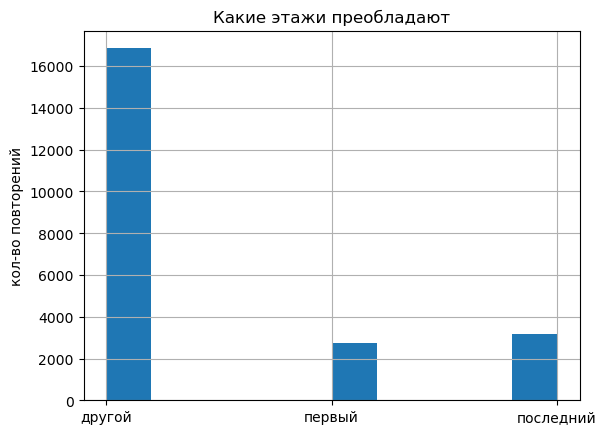

In [200]:
gost_apartments['type_apartment_floor'].hist()
plt.title('Какие этажи преобладают')
plt.ylabel('кол-во повторений')
plt.show()

В основном преобладают этажи типа другой.

Очень мало квартир имеют первый и последний этаж.

Первый этаж часто занимают предприниматели для оказания каких - либо услуг.

Последний скорей всего не так популярен, из за не удобства долго добираться.

**Исследовательский анализ данных столбца 'floors_total'**

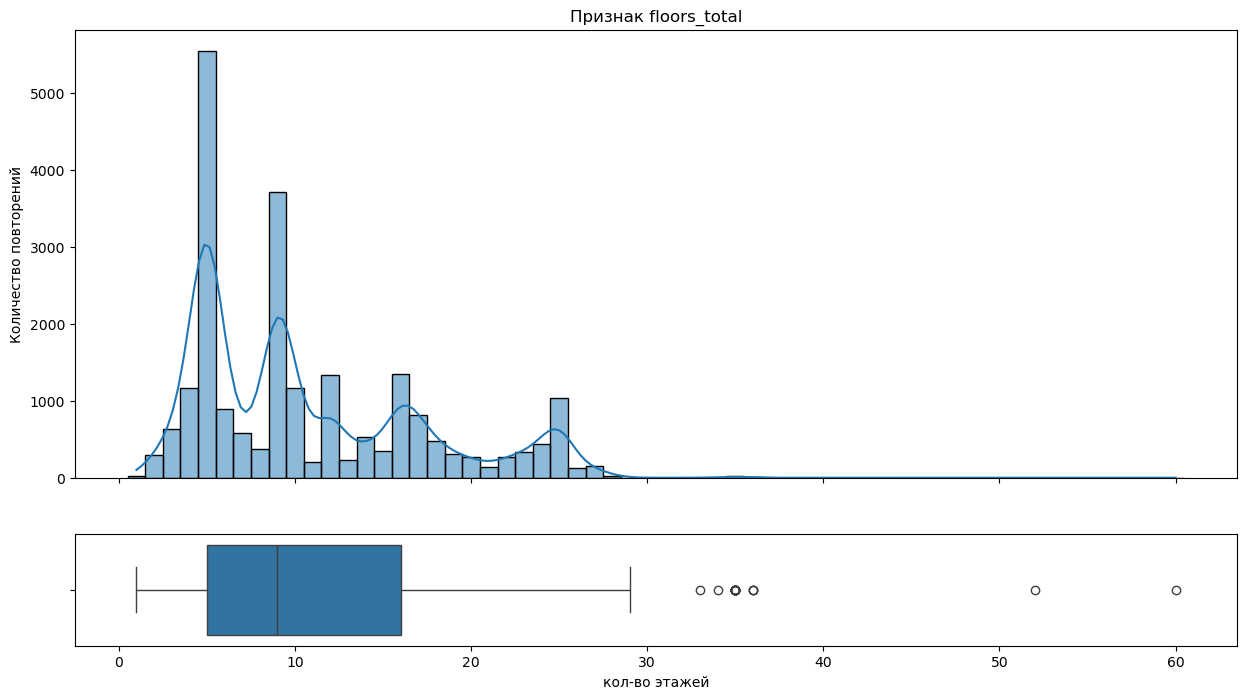

In [203]:
# вызываем ф-ю для построения для построения гистрограммы и диаграммы размаха для числовых признаков
build_hist_boxplot(gost_apartments, 'floors_total', 'Признак floors_total', 'кол-во этажей')

In [204]:
gost_apartments['floors_total'].describe()

count    22789.000000
mean        10.690640
std          6.548589
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Кол-во этаже в основном до 16.

Странныые квартиры с одним этажом.

Квартиры с большим кол-ом этажей в принципе реальны.


In [206]:
display(gost_apartments.query('floors_total < 2').head())
display(gost_apartments.query('floors_total < 2').shape)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_category,pub_date,price_square_meter,day_week_pub,month_pub,year_pub,type_apartment_floor,cityCenters_nearest_in_km
3062,20,2000000.0,80.0,2018-01-03T00:00:00,3,2.65,1.0,48.500000,1,False,False,False,10.0,0.0,Волосово,NaN,NaN,NaN,NaN,NaN,NaN,44.0,город,2018-01-03,25000.00,2,1,2018,первый,NaN
4358,5,5300000.0,58.5,2017-11-15T00:00:00,2,2.65,1.0,31.600000,1,False,False,False,9.4,0.0,поселок городского типа Рощино,NaN,NaN,NaN,NaN,NaN,NaN,226.0,ПГТ,2017-11-15,90598.29,2,11,2017,первый,NaN
5273,5,2990000.0,60.0,2018-11-15T00:00:00,3,2.65,1.0,50.000000,1,False,False,False,10.0,0.0,поселок станции Вещево,NaN,NaN,NaN,NaN,NaN,NaN,40.0,поселок станции,2018-11-15,49833.33,3,11,2018,первый,NaN
5757,16,9000000.0,88.0,2018-08-06T00:00:00,3,2.65,1.0,50.769231,1,False,False,False,9.1,0.0,Санкт-Петербург,44870.0,20802.0,0.0,NaN,1.0,792.0,60.0,город,2018-08-06,102272.73,0,8,2018,первый,21.0
8294,10,2700000.0,80.0,2018-07-07T00:00:00,3,3.00,1.0,45.000000,1,False,False,False,15.0,0.0,Луга,NaN,NaN,NaN,NaN,NaN,NaN,51.0,город,2018-07-07,33750.00,5,7,2018,первый,NaN


(16, 30)

Таких данных немного. 

В России встречаются квартиры малоэтажной застройки.

Данные оставим.

**Исследовательский анализ данных столбца 'cityCenters_nearest'**

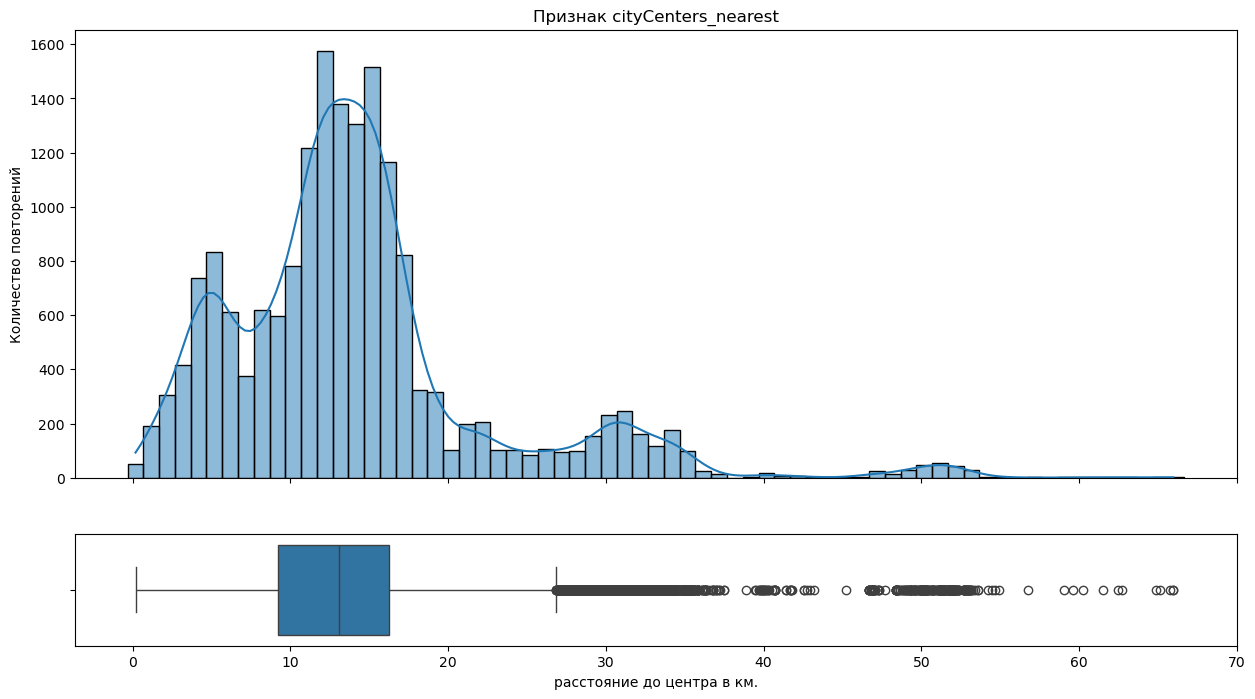

In [209]:
# вызываем ф-ю для построения для построения гистрограммы и диаграммы размаха для числовых признаков
build_hist_boxplot(gost_apartments[['cityCenters_nearest']]/1000, 'cityCenters_nearest', 'Признак cityCenters_nearest', 'расстояние до центра в км.')

In [210]:
gost_apartments['cityCenters_nearest'].describe()

count    17761.000000
mean     14189.154665
std       8603.422525
min        181.000000
25%       9238.000000
50%      13098.000000
75%      16280.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

город
count    16857.000000
mean     13688.652192
std       8433.874350
min        181.000000
25%       8850.000000
50%      12765.000000
75%      15785.000000
max      62706.000000
Name: cityCenters_nearest, dtype: float64


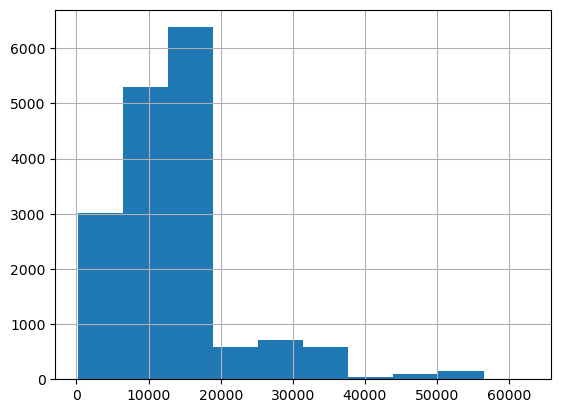

поселок
count      904.000000
mean     23522.086283
std       6012.135750
min      17012.000000
25%      18900.000000
50%      21203.000000
75%      28265.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64


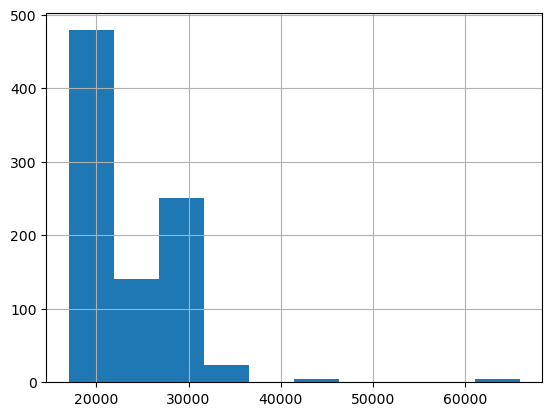

ПГТ
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: cityCenters_nearest, dtype: float64


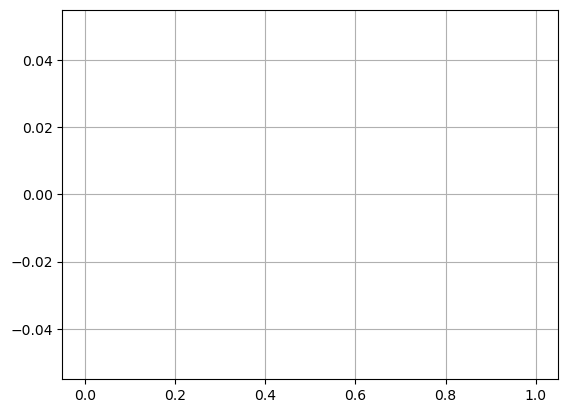

деревня
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: cityCenters_nearest, dtype: float64


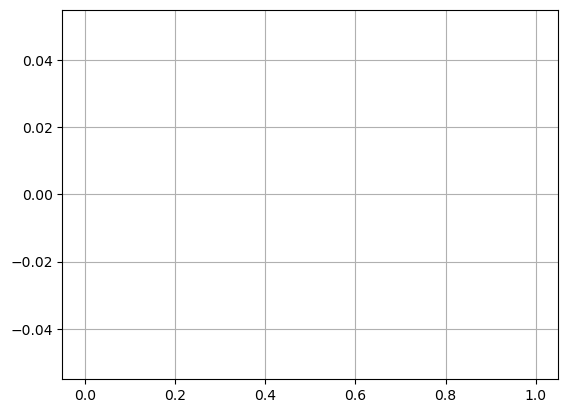

садовое товарищество
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: cityCenters_nearest, dtype: float64


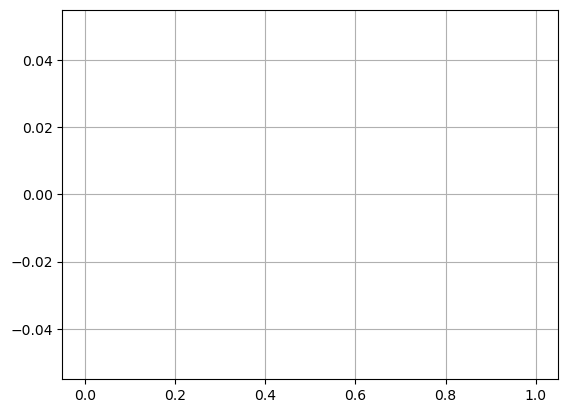

село
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: cityCenters_nearest, dtype: float64


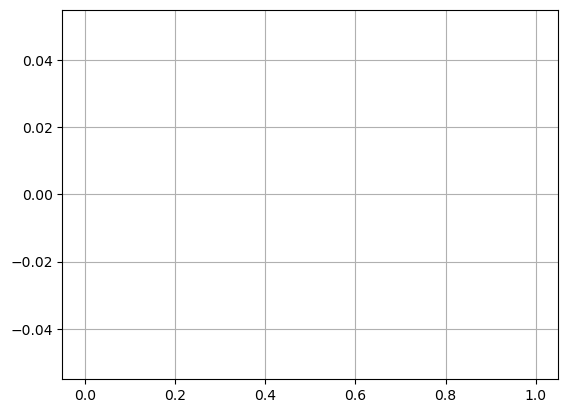

поселок станции
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: cityCenters_nearest, dtype: float64


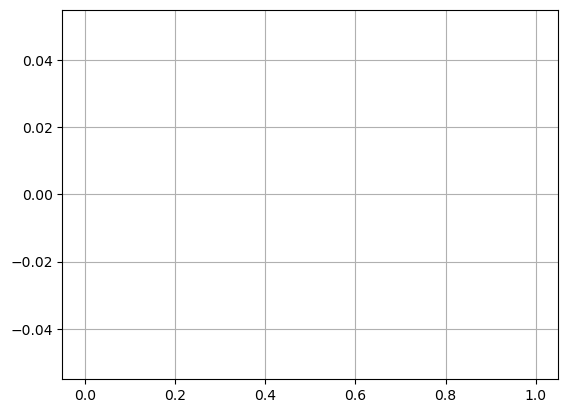

коттеджный поселок
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: cityCenters_nearest, dtype: float64


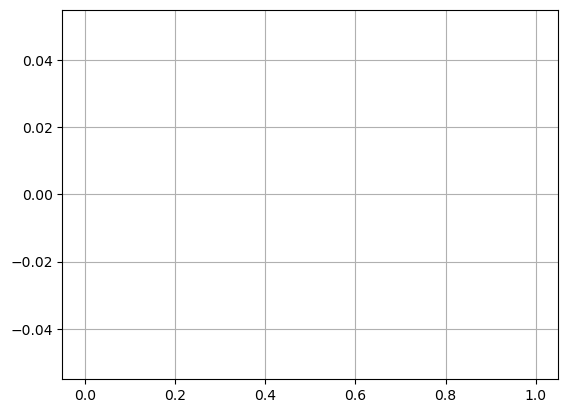

In [211]:
#Рассмотрим как распределяюстя расстояния до центра в зависимости от типа населенного пунтка
for d in gost_apartments['locality_name_category'].unique():
    print(d)
    print(gost_apartments.loc[(gost_apartments['locality_name_category'] == d), 'cityCenters_nearest'].describe())
    gost_apartments.loc[(gost_apartments['locality_name_category'] == d), 'cityCenters_nearest'].hist()
    plt.show()

Расстояния до центра в городах в основном до 15 км вполне реальны, нет слишком больших значений. 

В поселках большие значение, так как там врядли есть центр, скорей всего это расстояния до центра города.

**Исследовательский анализ данных столбца 'parks_nearest'**

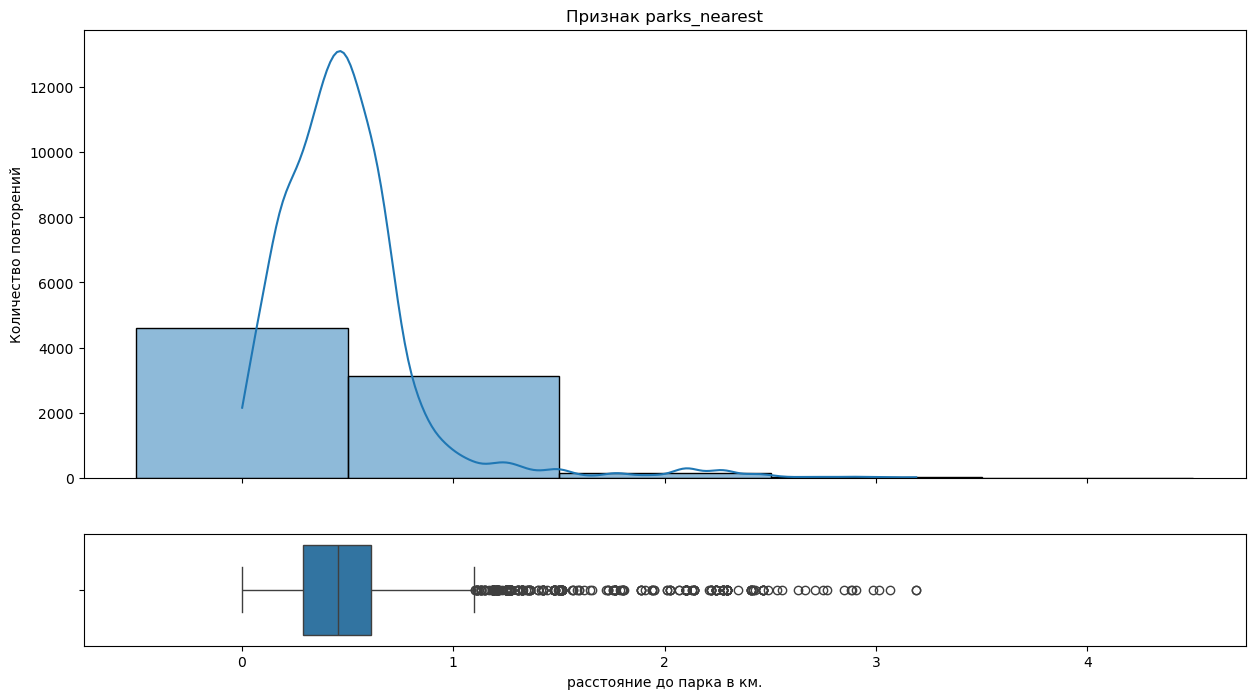

In [214]:
# вызываем ф-ю для построения для построения гистрограммы и диаграммы размаха для числовых признаков
build_hist_boxplot(gost_apartments[['parks_nearest']]/1000, 'parks_nearest', 'Признак parks_nearest', 'расстояние до парка в км.')

In [215]:
gost_apartments['parks_nearest'].describe()

count    7915.000000
mean      490.363613
std       342.754870
min         1.000000
25%       287.000000
50%       453.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

Парки в основном расположены на расстонии до 612 метров.

Есть странное расстояние в 1 м, нужно проверить.

In [217]:
gost_apartments.query('parks_nearest < 2')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_category,pub_date,price_square_meter,day_week_pub,month_pub,year_pub,type_apartment_floor,cityCenters_nearest_in_km
14539,8,3770000.0,45.4,2019-03-20T00:00:00,2,2.65,9.0,28.43,2,False,False,False,6.9,0.0,Санкт-Петербург,43932.0,16436.0,1.0,1.0,0.0,NaN,42.0,город,2019-03-20,83039.65,2,3,2019,другой,16.0


В принципе такое возможно когда парк распложен прямо у дома.

**Изучите, как быстро продавались квартиры (столбец days_exposition).**

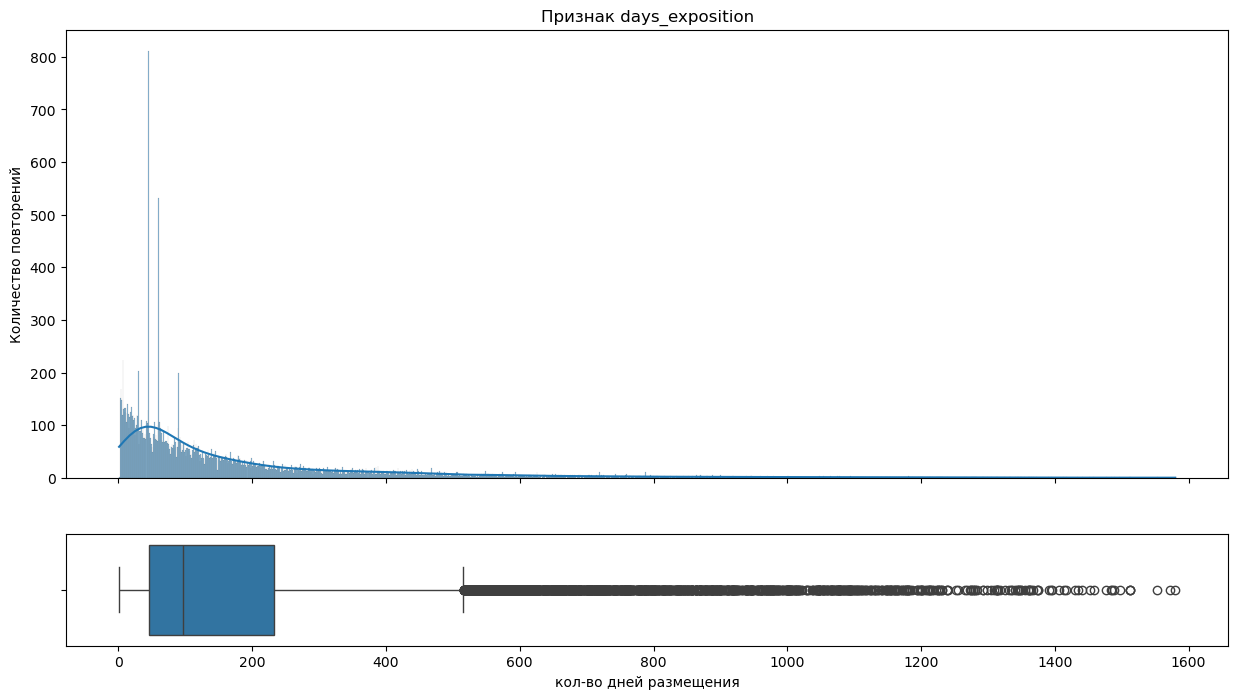

In [220]:
# вызываем ф-ю для построения для построения гистрограммы и диаграммы размаха для числовых признаков
build_hist_boxplot(gost_apartments, 'days_exposition', 'Признак days_exposition', 'кол-во дней размещения')

In [221]:
gost_apartments['days_exposition'].describe()

count    19717.000000
mean       182.177715
std        221.089173
min          1.000000
25%         45.000000
50%         96.000000
75%        233.000000
max       1580.000000
Name: days_exposition, dtype: float64

Быстрые продажи были менее чем за 45 дней.
Все что больше 233 дней - необычно долгие продажи


**Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта.**

**total_area**

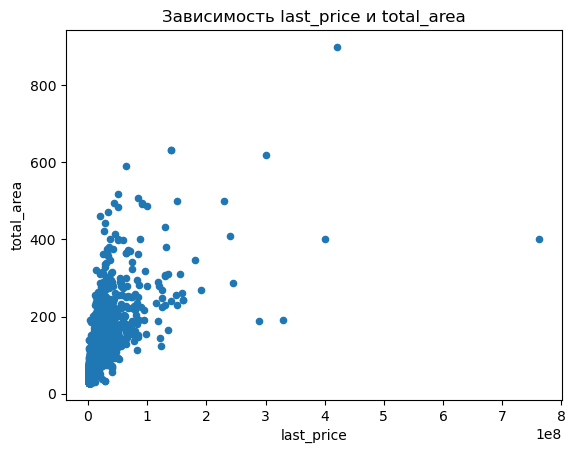

In [225]:
#Рассмотрим зависимость цена и общей площади квартиры методом plot()
gost_apartments.plot(x = 'last_price', y = 'total_area', kind = 'scatter')
plt.title('Зависимость last_price и total_area')
plt.show()

In [226]:
#Оценим коэфф. Пирсона, чтобы понять как сильно есть ли линейная связь данных 
gost_apartments['last_price'].corr(gost_apartments['total_area'])

0.6532590210937054

Связь наблюдается, но попадается много исключений, когда цены примерно одинаковые а площади значительно отличаются.

Проверим связь данных для разных группировок.

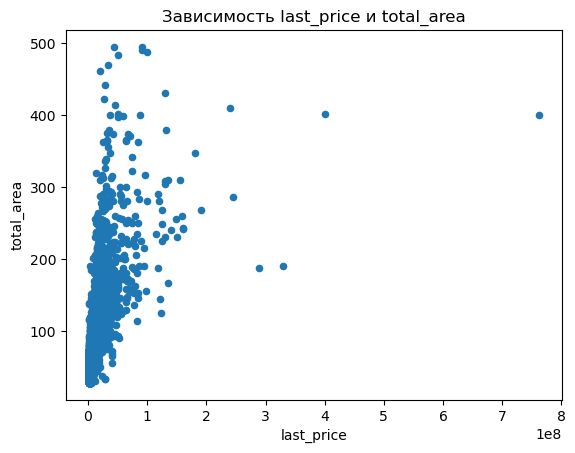

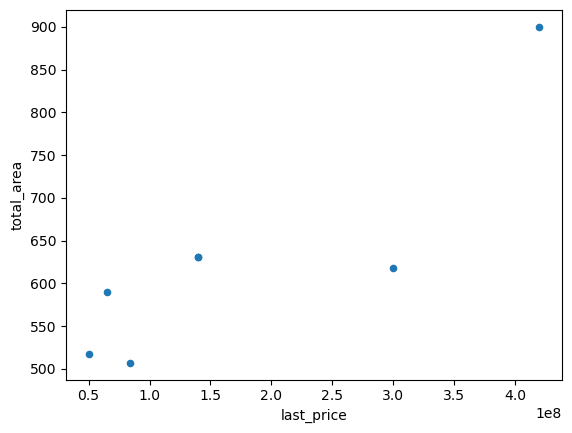

In [228]:
gost_apartments.query('total_area < 500').plot(x = 'last_price', y = 'total_area', kind = 'scatter')
plt.title('Зависимость last_price и total_area')
plt.show()
gost_apartments.query('total_area > 500').plot(x = 'last_price', y = 'total_area', kind = 'scatter')
plt.show()

In [229]:
gost_apartments['last_price'].corr(gost_apartments.query('total_area < 500')['total_area'])

0.6238741434011887

In [230]:
gost_apartments['last_price'].corr(gost_apartments.query('total_area > 500')['total_area'])

0.8716636719543364

Нельза сказать, что есть четкая связь цены и общей площади, так как попадаются исключения.

Квартиры с общей площадью до 200 кв.м имеют приблизительно одинаковую цен

Начиная с общей площадью 500 кв.метров и выше наблюдается прямая связь цены и общей площаиу.

**living_area**

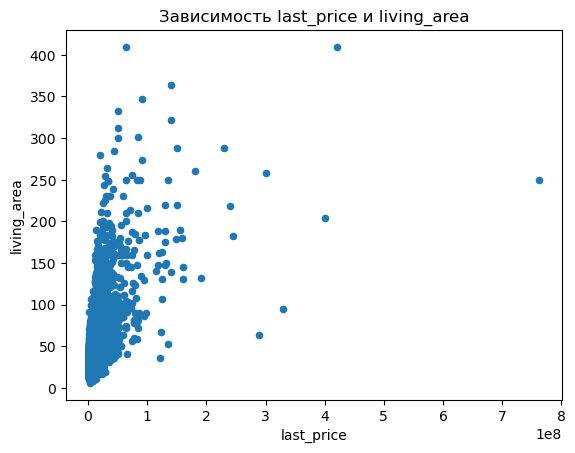

In [233]:
#Рассмотрим зависимость цена и жилой площади квартиры методом plot()
gost_apartments.plot(x = 'last_price', y = 'living_area', kind = 'scatter')
plt.title('Зависимость last_price и living_area')
plt.show()

In [234]:
#Оценим коэфф. Пирсона, чтобы понять как сильно есть ли линейная связь данных 
gost_apartments['last_price'].corr(gost_apartments['living_area'])

0.5852835888348191

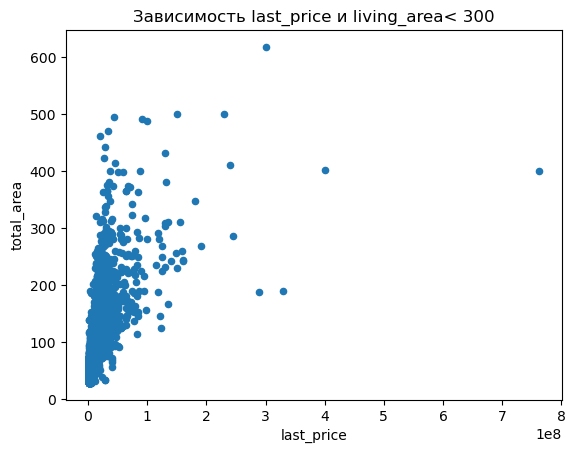

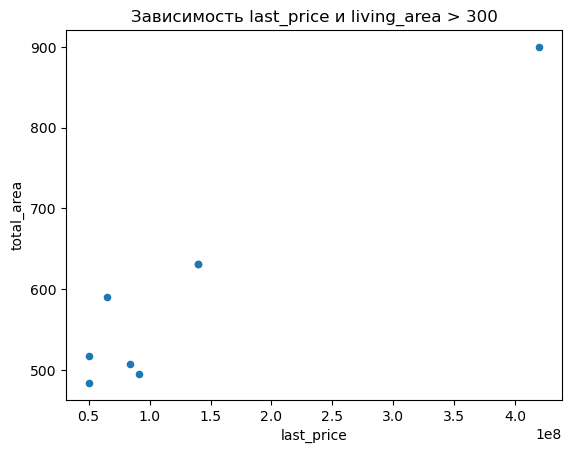

In [235]:
gost_apartments.query('living_area < 300').plot(x = 'last_price', y = 'total_area', kind = 'scatter')
plt.title('Зависимость last_price и living_area< 300')
plt.show()
gost_apartments.query('living_area > 300').plot(x = 'last_price', y = 'total_area', kind = 'scatter')
plt.title('Зависимость last_price и living_area > 300')
plt.show()

In [236]:
gost_apartments['last_price'].corr(gost_apartments.query('living_area > 300')['living_area'])

0.5644386407576688

In [237]:
gost_apartments['last_price'].corr(gost_apartments.query('living_area < 300')['living_area'])

0.569921009530525

Графики походят на связь цены и общей площади, но коэфф. Пиросона показал меньшую связь.

**kitchen_area**

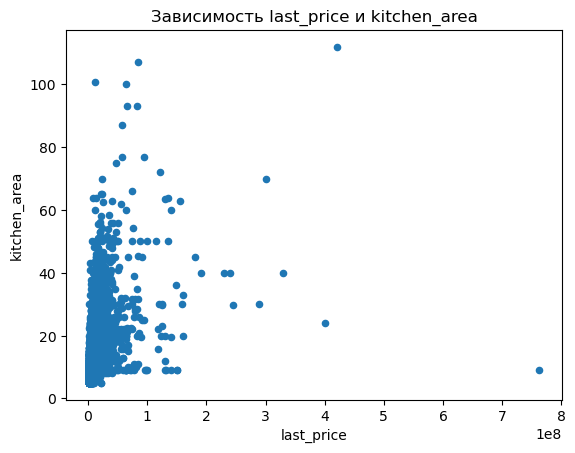

In [240]:
gost_apartments.plot(x = 'last_price', y = 'kitchen_area', kind = 'scatter')
plt.title('Зависимость last_price и kitchen_area')
plt.show()

In [241]:
gost_apartments['last_price'].corr(gost_apartments['kitchen_area'])

0.43876630236270914

In [242]:
gost_apartments['last_price'].corr(gost_apartments.query('kitchen_area < 100')['kitchen_area'])

0.42423610507294146

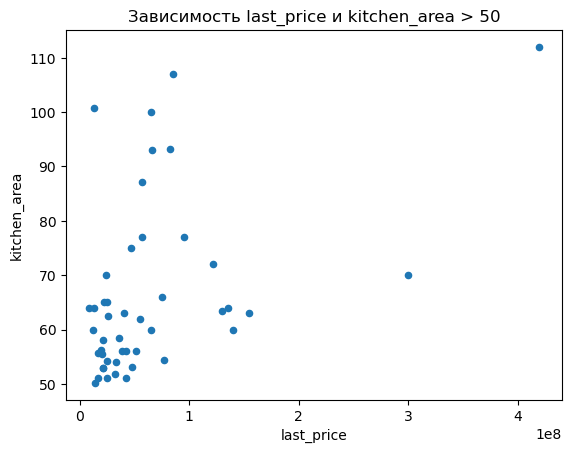

In [243]:
gost_apartments.query('kitchen_area > 50').plot(x = 'last_price', y = 'kitchen_area', kind = 'scatter')
plt.title('Зависимость last_price и kitchen_area > 50')
plt.show()

In [244]:
gost_apartments['last_price'].corr(gost_apartments.query('kitchen_area > 50')['kitchen_area'])

0.4520965251897987

Связь дынных слабая, нельзя сказать, что цена квартиры зависит от цены.

**rooms**

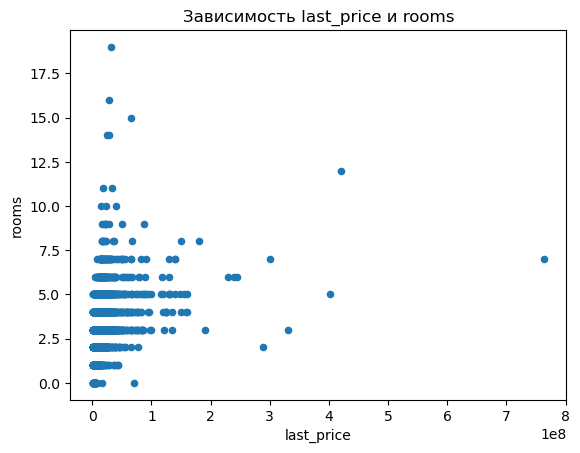

In [247]:
gost_apartments.plot(x = 'last_price', y = 'rooms', kind = 'scatter')
plt.title('Зависимость last_price и rooms')
plt.show()

In [248]:
gost_apartments['last_price'].corr(gost_apartments['rooms'])

0.361656110018847

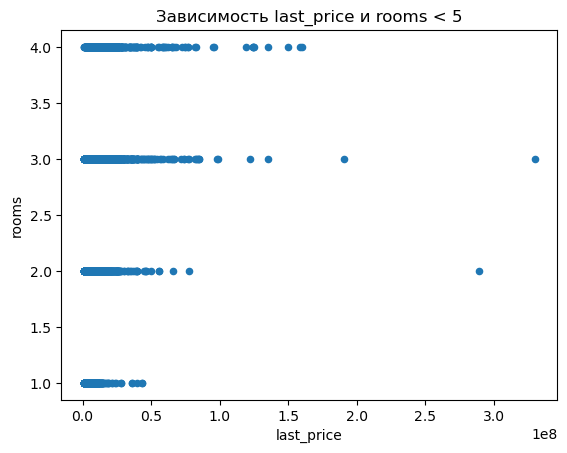

In [249]:
gost_apartments.query('rooms < 5 and studio == False and open_plan == False').plot(x = 'last_price', y = 'rooms', kind = 'scatter')
plt.title('Зависимость last_price и rooms < 5')
plt.show()

In [250]:
gost_apartments['last_price'].corr(gost_apartments.query('rooms < 5 and studio == False and open_plan == False')['rooms'])

0.32877244823871515

Цена может быть одинаковой при разном кол-ве комнат, связь не наблюдается.

**type_apartment_floor, day_week_pub, month_pub, year_pub**

От типа этажа, дня недели, месяца и года размещения стоимость зависит нелинейно - поэтому для визуализации зависимости стоит использовать графики типа bar по средним или медианам.


In [254]:
gost_apartments.pivot_table(index = 'type_apartment_floor', values = 'last_price', aggfunc =  ('count', 'median'))

,count,median
type_apartment_floor,,
другой,16856,4900000.0
первый,2749,4000000.0
последний,3184,4400000.0


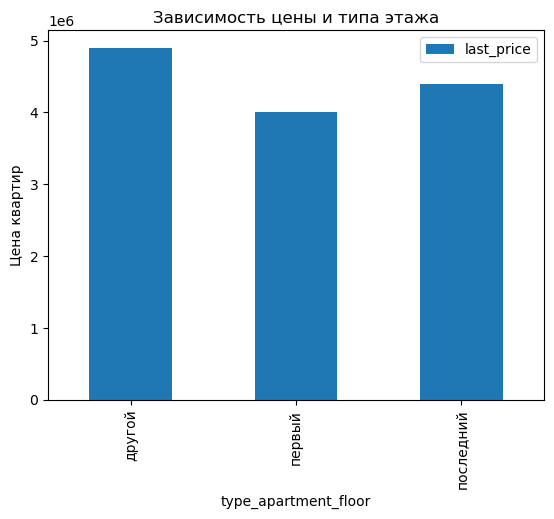

In [255]:
gost_apartments.pivot_table(index = 'type_apartment_floor', values = 'last_price', aggfunc = 'median').plot(kind = 'bar', y = 'last_price',
                                        title = 'Зависимость цены и типа этажа', ylabel = 'Цена квартир')
plt.show()

В основном кваритры продаются на этажах выше 1 и ниже последнего. Такие квартиры имеют большую стоимость.


Обычно первый этаж занимают предприниматели для каких - либо услуг.

Скорей всего люди не любят первые этажи в связи с большим риском кражи, шумов, повреждений окон...из за чего цены ниже.

In [257]:
gost_apartments.pivot_table(index = 'day_week_pub', values = 'last_price', aggfunc =  ('count', 'median'))

,count,median
day_week_pub,,
0,3482,4700000.0
1,4029,4800000.0
2,3815,4800000.0
3,4141,4710000.0
4,3851,4650000.0
5,1850,4650000.0
6,1621,4600000.0


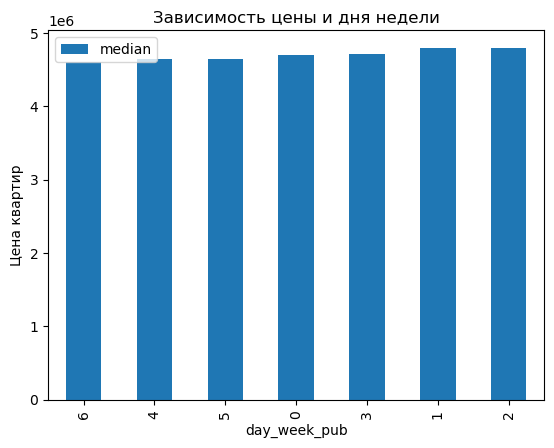

In [258]:
gost_apartments.pivot_table(index = 'day_week_pub', values = 'last_price', aggfunc =  ('count', 'median')).sort_values(by = 'median').plot(kind = 'bar', y = 'median',
                                            title = 'Зависимость цены и дня недели', ylabel = 'Цена квартир')
plt.show()

В основом закрытие обьявлений происходит в будние дни, так как суббота и воскресенья считаются выходными днями и риэлторы, допустим, отдыхают,может быть дргуие причины. 

Цены примерно одинаковые в любые дни недели.


In [260]:
gost_apartments.pivot_table(index = 'month_pub', values = 'last_price', aggfunc =  ('count', 'median')).sort_values(by = 'median')

,count,median
month_pub,,
6,1692,4500000.0
10,2059,4620000.0
5,1215,4646000.0
8,1676,4650000.0
1,1436,4700000.0
2,2548,4750000.0
3,2488,4750000.0
7,1619,4750000.0
12,1588,4750000.0


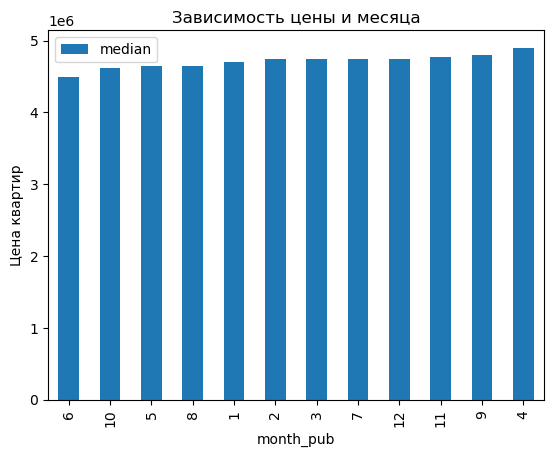

In [261]:
gost_apartments.pivot_table(index = 'month_pub', values = 'last_price', aggfunc =  ('count', 'median')).sort_values(by = 'median').plot(kind = 'bar', y = 'median',
                                            title = 'Зависимость цены и месяца', ylabel = 'Цена квартир')
plt.show()

В летние месяца почему - то квартир продают меньше. Продажи в основном в не теплые времена года.

Цены примерно одинаковые в любые месяца.


In [263]:
gost_apartments.pivot_table(index = 'year_pub', values = 'last_price', aggfunc =  ('count', 'median')).sort_values(by = 'median')

,count,median
year_pub,,
2017,7932,4550000.0
2016,2650,4641000.0
2018,8149,4650000.0
2019,2778,5150000.0
2015,1144,5352500.0
2014,136,7640000.0


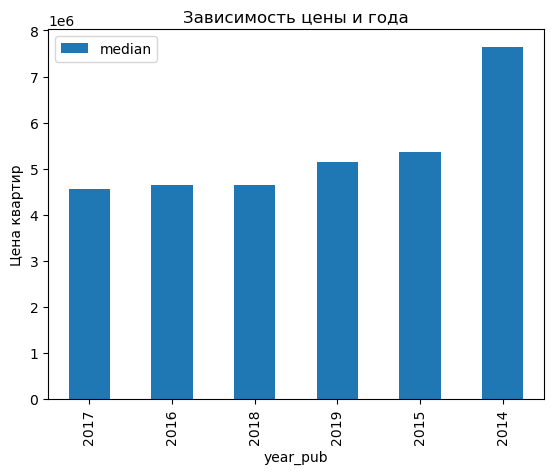

In [264]:
gost_apartments.pivot_table(index = 'year_pub', values = 'last_price', aggfunc =  ('count', 'median')).sort_values(by = 'median').plot(kind = 'bar', y = 'median',
                                            title = 'Зависимость цены и года', ylabel = 'Цена квартир')
plt.show()

После 2014 года квартиры стали продаваться чаще, но гораздо дешевле. 


За 2016 - 2018 цена на квартиры были примерно одинаковые.

Больше всех продаж пришлось на 2018 год, возможно это как то свзяно с экономическим положеним в стране.

**Cредняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений**

In [267]:
#С помощью сводной таблциы методом pivot_table() найдем 10 населенных пунктов с наибольшим числом объявлений
gost_apartments.pivot_table(index = 'locality_name', values = 'price_square_meter', aggfunc = ('count', 'mean')) \
.sort_values(by = 'count', ascending = False).head(10).sort_values(by = 'mean', ascending = False)

,count,mean
locality_name,,
Санкт-Петербург,15387,114668.210127
Пушкин,363,103210.915124
деревня Кудрово,270,91751.879704
поселок Парголово,324,90330.719784
поселок Мурино,486,84207.399362
поселок Шушары,431,78047.965244
Колпино,335,75348.399134
Гатчина,300,69079.329867
Всеволожск,389,68741.136761


В принципе логично, что Санкт-Петербург, имеет самую высокую цену квадратного метра.

Странно, что в ряде городов цены кв.метра ниже чем в некоторых деревнях и в поселках. Возможно это связано, с тем что деревни и поселки находятся недалеко от Санкт-Петербурга, это нужно дополнительно проверять.

**Выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите их среднюю стоимость на разном удалении от центра.**

In [270]:
#Для удобства создадим переменную которая будет содеражть цену и расстоние до центра только для Санкт-Петербурга
Saint_Petersburg_mean_price = gost_apartments.query('locality_name == "Санкт-Петербург"')[['cityCenters_nearest_in_km', 'last_price']]

При создании столбца cityCenters_nearest_in_km и округления его до ближайших значений, получились нулевые значения. Так как нам нужно учесть среднюю стоимость на разном удалении от центра на каждом 1 км, то сделаем упрощение, что значение 0 будут равняться 1 км.

In [272]:
Saint_Petersburg_mean_price.loc[Saint_Petersburg_mean_price['cityCenters_nearest_in_km'] == 0.0, 'cityCenters_nearest_in_km'] = 1.0

In [273]:
Saint_Petersburg_mean_price.loc[Saint_Petersburg_mean_price['cityCenters_nearest_in_km'] == 0.0, 'cityCenters_nearest_in_km']

Series([], Name: cityCenters_nearest_in_km, dtype: float64)

In [274]:
Saint_Petersburg_mean_price.pivot_table(index = 'cityCenters_nearest_in_km', values = 'last_price')

,last_price
cityCenters_nearest_in_km,
1.0,2.279636e+07
2.0,1.796627e+07
3.0,1.125068e+07
4.0,1.346010e+07
5.0,1.457870e+07
6.0,1.542548e+07
7.0,1.490717e+07
8.0,1.004134e+07
9.0,7.057844e+06


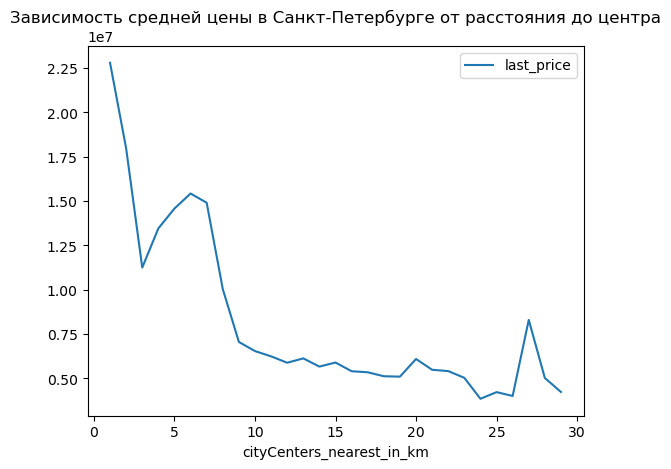

In [275]:
Saint_Petersburg_mean_price.pivot_table(index = 'cityCenters_nearest_in_km', values = 'last_price').plot()
plt.title('Зависимость средней цены в Санкт-Петербурге от расстояния до центра')
plt.show()

В общем чем дальше от центра тем цена квартиры ниже. 

Но в некоторых диапазонах расстояний до центра(3 - 6 км и 26 - 27 км) цены резко возрастают. Возможно это связано с близким расположеним к популяряным местам(достопримечательствам). Это нужно дополнительно проверять.

### 5 Напишите общий вывод

По предобработке данных:

Пропуски заменили:
- 'ceiling_height' - заменили медианным значением;
- 'living_area' - заменили отношеним total_area.median() на (total_area.median()/living_area.median());
- 'floor' - удалили пропуски, данных мало;
- 'is_apartment' - заменили на false;
- 'kitchen_area' - заменили отношеним total_area.median() на (total_area.median()/kitchen_area.median());
- 'balcony' - заменили на 0;
- 'locality_name' - поменяли ё на е, заменили уникальные значения, пропуски удалили;
- Данные из геосервисов с пропусками оставили как есть.

Добавили новый столбец который показывает какой тип населенного пункта(locality_name_category)

Добавили новый столбец с форматов datatime(pub_date)

Заменили тип float на int, где вещественные числа всегда целые(этаж, кол-во комнат).

Добавили в таблицу новые столбцы со следующими параметрами:
- цена одного квадратного метра(price_square_meter);
- день недели публикации объявления day_week_pubе);
- месяц публикации объявления(month_pub);
- год публикации объявления(year_pub);
- тип этажа квартиры(type_apartment_floor);
- расстояние до центра города в км.(cityCenters_nearest_in).

По исследовательскому анализу данных:

- Построили ряд гистрограмм, определили аномальные значения.
- Ряд площадей удалили из данных, так как они не соответствуют ГОСТ.
- Обработали высоту потолков - больше 10 метров разделили на 10, удалили потолки ниже 2.5 метров в соответсвии ГОСТ.
- Определили, что продажи квартиры меньше чем за 45 дней это очень быстро, необычно долго продаются квартиры от 233 дней и больше.
- Цена больше всех зависит от общей площади, явная линейная положительная зависимость наблюдается у квартир с площадью 500 кв.м и больше.
- В основном кваритры продаются на этажах выше 1 и ниже последнего. Такие квартиры имеют большую стоимость.
- В основом закрытие обьявлений происходит в будние дни.
- Цены примерно одинаковые в любые дни недели.
- В летние месяца квартир продают меньше.
- Продажи в основном в не теплые времена года.
- Цены примерно одинаковые в любые месяца.
- После 2014 года квартиры стали продаваться чаще, но гораздо дешевле.
- За 2016 - 2018 цены на квартиры были примерно одинаковые.
- Больше всех продаж пришлось на 2018 год.
- Больше всех объвлений и цена на 1 кв.метр в Санкт - Петербурге. В Выборге цена на 1 кв.метр меньше всех среди 9 самых популярных населенных пунктах.
- В Санкт - Петербурге квартиры ближе к центру гороздо дороже.
